# Projeto: Desenvolver um modelo de concessão de crédito
### Disciplina: Visão de processo de análise, Pós-graduação | Cesar School | Neurotech
### Aluno: João França

### *Agenda:*
1. Entendimento da base
2. Pré-processamento & Treinamento
3. Análise técnica
4. Análise financeira
5. Escoragem da base Out-of-time


### 1. Entendimento da base

In [25]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics and Evaluation
from sklearn.metrics import mutual_info_score, roc_auc_score, confusion_matrix, classification_report

# Data Profiling
from ydata_profiling import ProfileReport

# Feature Engineering
from feature_engine.imputation import AddMissingIndicator

# Preprocessing and Transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# Model Selection and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Displaying Results
from sklearn.metrics import ConfusionMatrixDisplay

# Text Data Vectorization
from skrub import TableVectorizer


from sklearn.compose import make_column_selector as selector

# Set display options for pandas
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)


In [26]:
df = pd.read_csv('../datasets/credit_01/train.gz', compression='gzip')

In [27]:
df.shape

(101128, 151)

In [28]:
df.head()

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21,VAR22,VAR23,VAR24,VAR25,VAR26,VAR27,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38,VAR39,VAR40,VAR41,VAR42,VAR43,VAR44,VAR45,VAR46,VAR47,VAR48,VAR49,VAR50,VAR51,VAR52,VAR53,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63,VAR64,VAR65,VAR66,VAR67,VAR68,VAR69,VAR70,VAR71,VAR72,VAR73,VAR74,VAR75,VAR76,VAR77,VAR78,VAR79,VAR80,VAR81,VAR82,VAR83,VAR84,VAR85,VAR86,VAR87,VAR88,VAR89,VAR90,VAR91,VAR92,VAR93,VAR94,VAR95,VAR96,VAR97,VAR98,VAR99,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-16 00:00:00+00:00,1,F,76.126,NaN,SP,-23.568523,-46.804297,C,E,BAIXA,2.0,0.305,NaN,0.146,0.138,NaN,NaN,0.503899,0.347735,NaN,NaN,0.250,NaN,0.052,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.624806,0.480278,0.526963,0.761115,NaN,NaN,NaN,NaN,1.000,NaN,S,N,N,S,N,N,N,S,N,N,N,N,S,N,S,S,N,ALTA,ALTISSIMA,ALTISSIMA,ALTISSIMA,ALTA,MEDIA,ALTISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,ALTISSIMA,ALTA,ALTA,ALTA,ALTA,BAIXISSIMA,MEDIA,ALTA,ALTISSIMA,ALTA,ALTISSIMA,MEDIA,ALTA,ALTA,MEDIA,ALTISSIMA,ALTA,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,MEDIO,MEDIO,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MUITO PROXIMO,LONGE,MUITO LONGE,MEDIO,MEDIO,LONGE,LONGE,LONGE,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,LONGE,MEDIO,PROXIMO,MEDIO,MEDIO,LONGE,MUITO PROXIMO,4094.377623,C,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,123791
1,2017-02-07 00:00:00+00:00,1,NaN,NaN,NaN,SP,-23.189738,-46.815943,NaN,E,MEDIA,0.0,0.205,NaN,0.105,0.114,3.833333,NaN,0.128767,1.309589,NaN,NaN,0.250,NaN,0.138,0.065,NaN,NaN,NaN,NaN,NaN,NaN,DECLARACAO NAO ENVIADA,NaN,NaN,NaN,NaN,NaN,NaN,0.380323,0.389401,0.421293,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,MEDIA,ALTA,BAIXISSIMA,MEDIA,ALTA,MEDIA,MEDIA,ALTA,ALTA,ALTA,ALTA,MEDIA,MEDIA,ALTA,ALTA,BAIXISSIMA,MEDIA,MEDIA,BAIXISSIMA,ALTA,ALTA,ALTA,ALTISSIMA,MEDIA,MEDIA,ALTISSIMA,ALTISSIMA,LONGE,LONGE,LONGE,LONGE,LONGE,LONGE,MEDIO,PROXIMO,MEDIO,LONGE,LONGE,PROXIMO,LONGE,LONGE,MEDIO,LONGE,PROXIMO,LONGE,MUITO LONGE,MEDIO,LONGE,MEDIO,LONGE,PROXIMO,MEDIO,MEDIO,LONGE,MEDIO,LONGE,LONGE,MEDIO,MEDIO,LONGE,MEDIO,PROXIMO,LONGE,MEDIO,MEDIO,MUITO PROXIMO,1347.882336,E,NaN,NaN,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,246754
2,2017-03-11 00:00:00+00:00,1,NaN,NaN,NaN,PE,-7.563015,-35.013143,NaN,E,ALTISSIMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211022,0.412692,0.870564,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,ALTA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,MEDIA,BAIXISSIMA,MEDIA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXISSIMA,BAIXA,BAIXISSIMA,BAIXISSIMA,LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO LONGE,PROXIMO,LONGE,LONGE,MUITO LONGE,LONGE,LONGE,PROXIMO,MUITO LONGE,PROXIMO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,LONGE,MUITO LONGE,MEDIO,MUITO LONGE,MUITO LONGE,MUITO LONGE,LONGE,LONGE,LONGE,LONGE,MUITO LONGE,MUITO PROXIMO,1428.485398,E,NaN,NaN,NaN,NaN,102,NOME INEXISTENTE#@#EMAIL INEXISTENTE,2.6.1,169817
3,2017-04-28 00:00:00+00:00,1,F,65.786,NaN,AM,-3.119028,-60

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,101128.0,0.792362,0.405618,0.000000,1.000000,1.000000,1.000000,1.000000
IDADE,89534.0,42.161148,15.260838,18.014000,29.962000,39.860000,53.093000,106.904000
VAR6,98293.0,-14.428152,8.993989,-33.521563,-22.832742,-13.035421,-6.358850,4.478585
VAR7,98293.0,-45.899547,7.514249,-72.900276,-49.903564,-46.574773,-39.030739,-32.429516
VAR11,62409.0,0.235863,0.627456,-4.000000,0.000000,0.000000,0.000000,4.000000
VAR12,54908.0,0.224095,0.258586,0.000000,0.045000,0.127000,0.286000,1.000000
VAR13,12995.0,0.317799,0.242797,0.000000,0.057000,0.321000,0.511000,1.000000
VAR14,79717.0,0.147905,0.124041,0.000000,0.102000,0.127000,0.154000,1.000000
VAR15,48955.0,0.185065,0.195153,0.000000,0.078000,0.111000,0.152500,1.000000
VAR16,37577.0,2.066357,3.212567,0.083333,0.250000,0.833333,2.416667,15.999999


In [30]:
df.dtypes

REF_DATE     object
TARGET        int64
VAR2         object
IDADE       float64
VAR4         object
VAR5         object
VAR6        float64
VAR7        float64
VAR8         object
VAR9         object
VAR10        object
VAR11       float64
VAR12       float64
VAR13       float64
VAR14       float64
VAR15       float64
VAR16       float64
VAR17       float64
VAR18       float64
VAR19       float64
VAR20       float64
VAR21       float64
VAR22       float64
VAR23       float64
VAR24       float64
VAR25       float64
VAR26       float64
VAR27       float64
VAR28       float64
VAR29       float64
VAR30       float64
VAR31        object
VAR32        object
VAR33        object
VAR34        object
VAR35        object
VAR36        object
VAR37       float64
VAR38        object
VAR39       float64
VAR40       float64
VAR41       float64
VAR42       float64
VAR43        object
VAR44       float64
VAR45        object
VAR46       float64
VAR47       float64
VAR48        object
VAR49        object


In [31]:
#Profilling
#profile = ProfileReport(df_train, title="Profiling Report")
#profile.to_file("your_report.html")

In [32]:
columns_list = list(df.columns)
features = [column for column in columns_list if column not in ['REF_DATE', 'ID']]


categorical_features = list(df[features].dtypes[df.dtypes == "object"].index)
numerical_features = list(df[features].dtypes[df.dtypes != "object"].index)

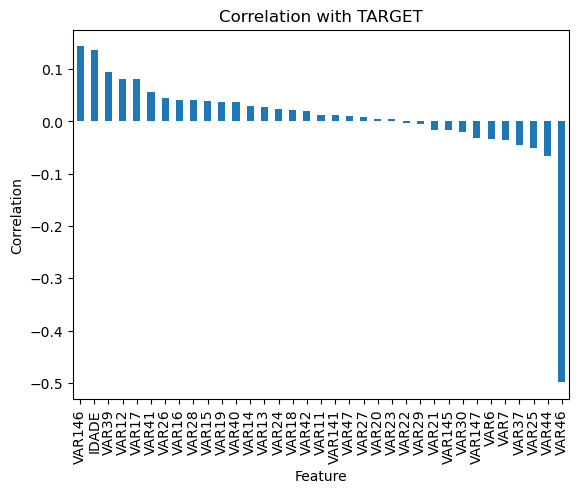

In [33]:
# Calculate the correlation between numerical features and the target variable

correlation = df[numerical_features].corr()['TARGET'].sort_values(ascending=False)
correlation[correlation < 1].plot(kind='bar')
plt.title('Correlation with TARGET')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

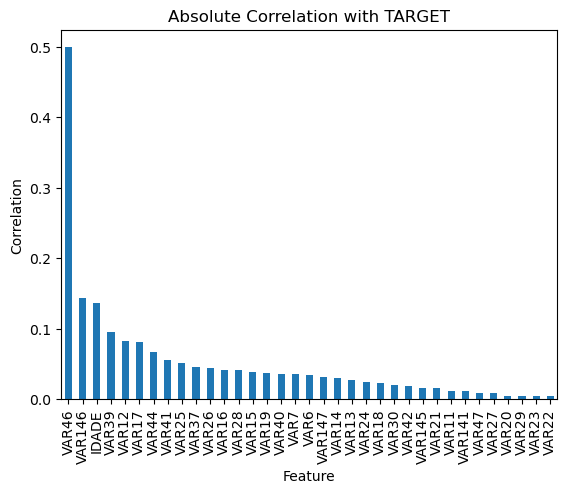

In [34]:
# Calculate the absolute correlation between numerical features and the target variable

abs_correlation = df[numerical_features].corr().abs()['TARGET'].sort_values(ascending=False)
abs_correlation[abs_correlation < 1].plot(kind='bar')
plt.title('Absolute Correlation with TARGET')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

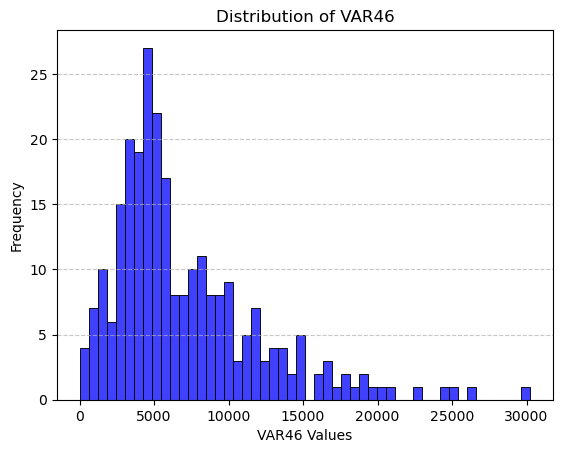

In [35]:
sns.histplot(data=df, x='VAR46', bins=50, kde=False, color='blue')

# Set the title and labels for the plot
plt.title('Distribution of VAR46')        # Set the plot title
plt.xlabel('VAR46 Values')               # Set the x-axis label
plt.ylabel('Frequency')                  # Set the y-axis label

# Improve readability by adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

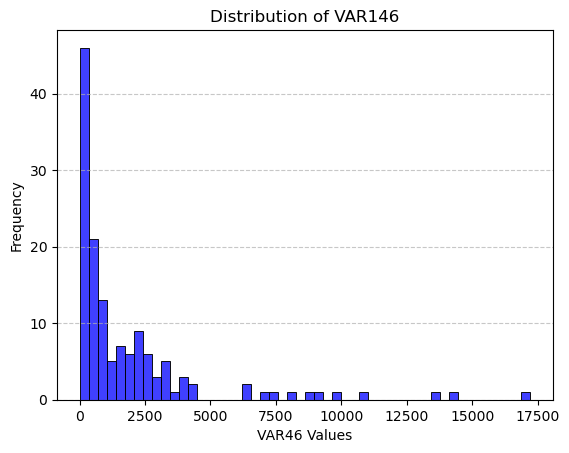

In [36]:
sns.histplot(data=df, x='VAR146', bins=50, kde=False, color='blue')

# Set the title and labels for the plot
plt.title('Distribution of VAR146')        # Set the plot title
plt.xlabel('VAR46 Values')               # Set the x-axis label
plt.ylabel('Frequency')                  # Set the y-axis label

# Improve readability by adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

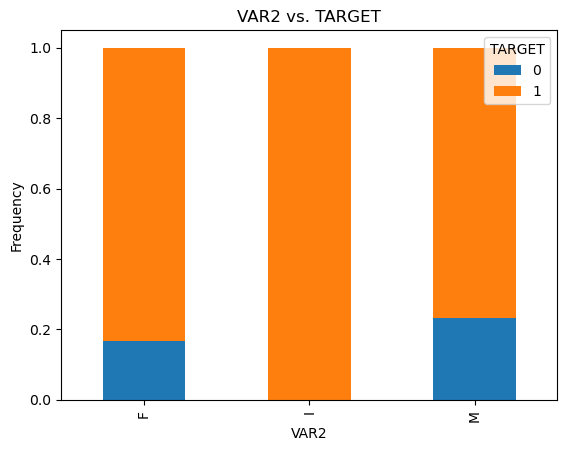

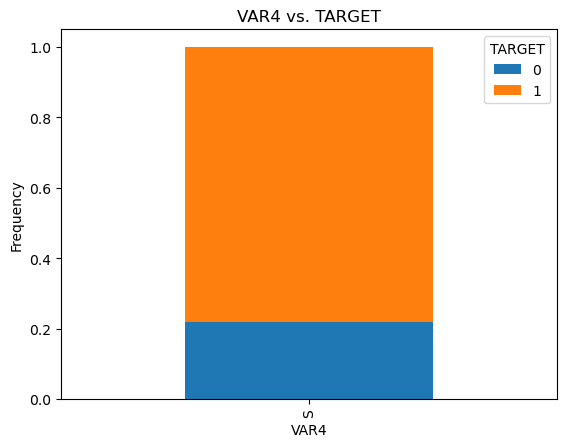

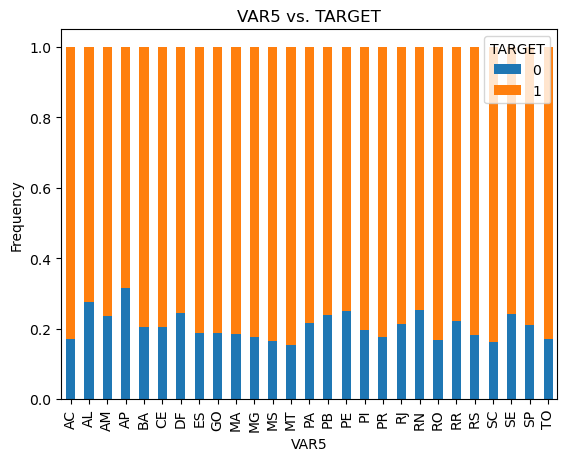

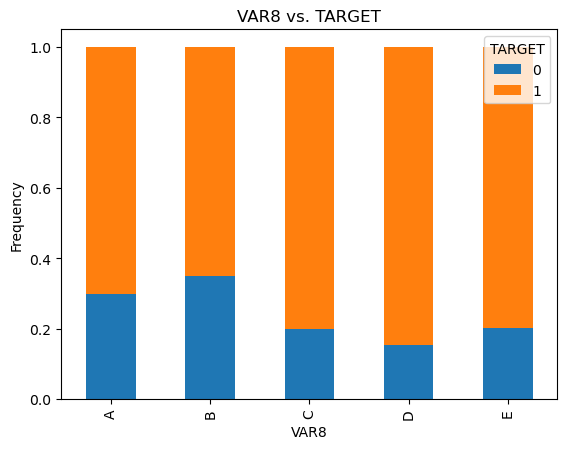

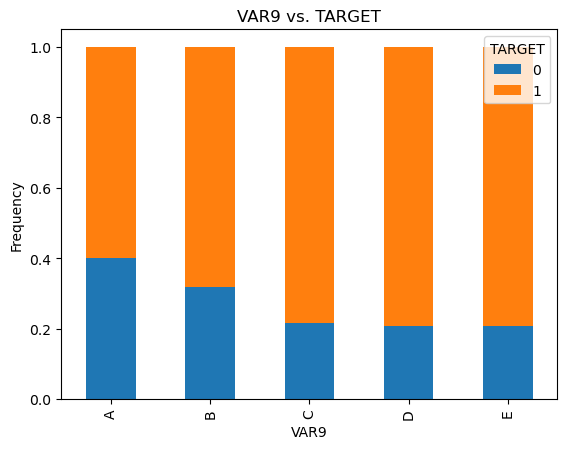

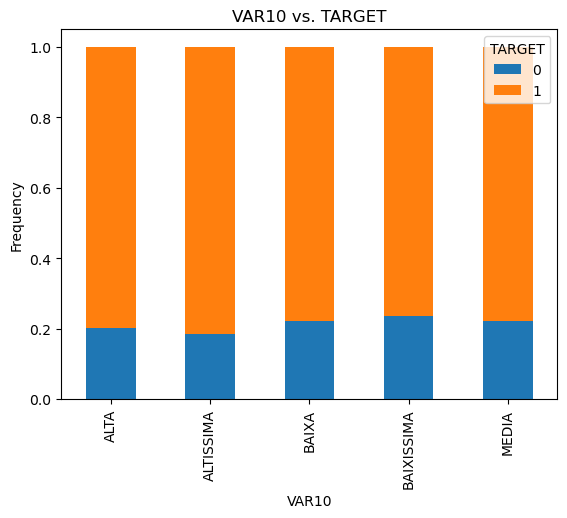

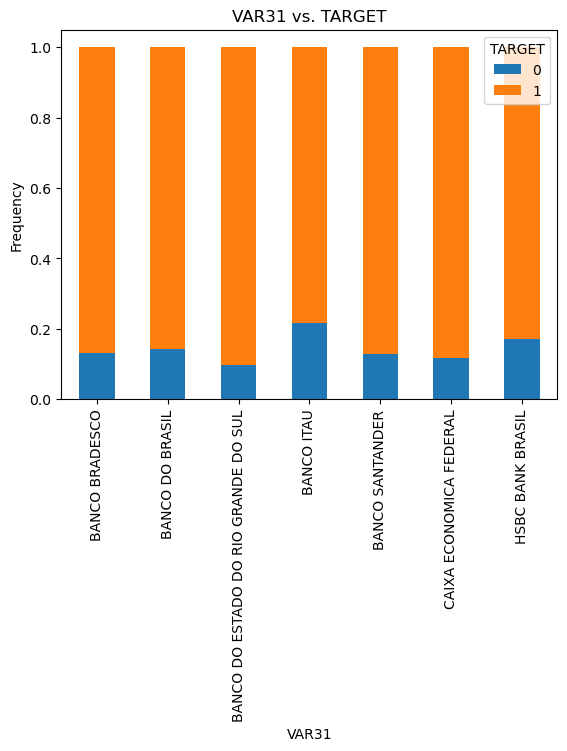

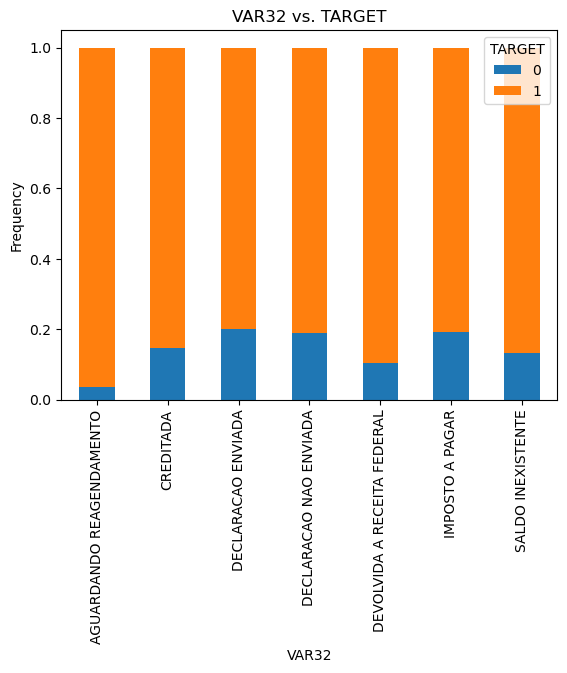

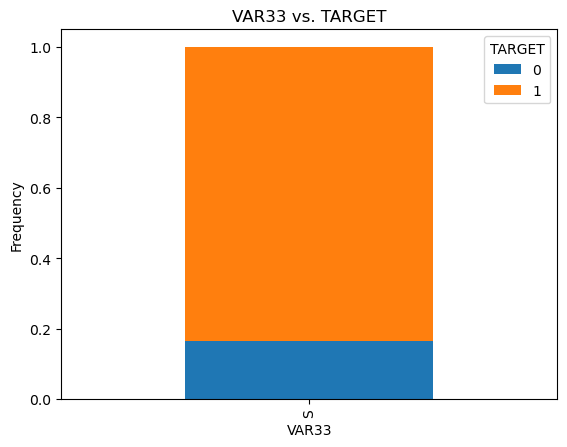

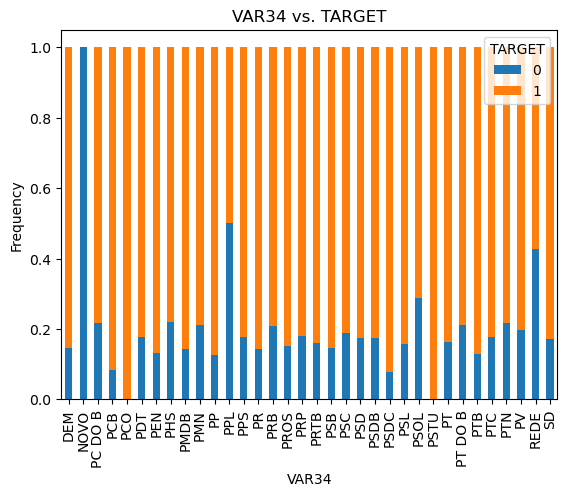

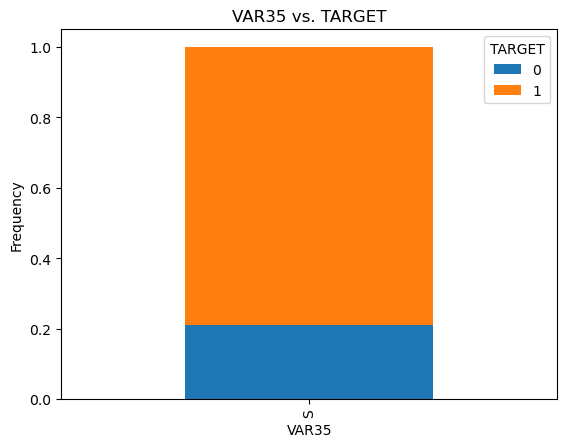

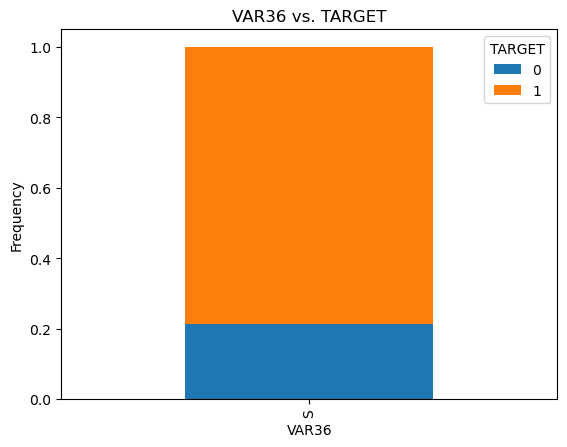

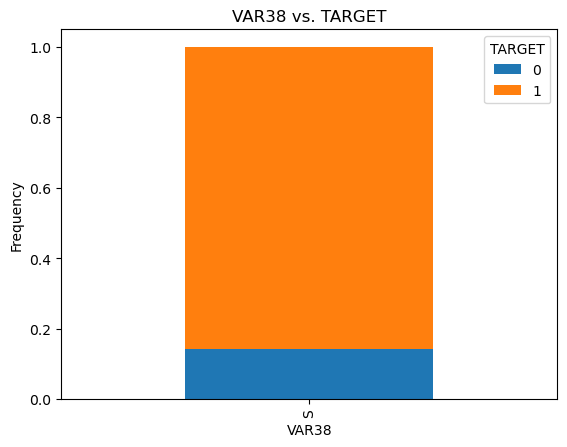

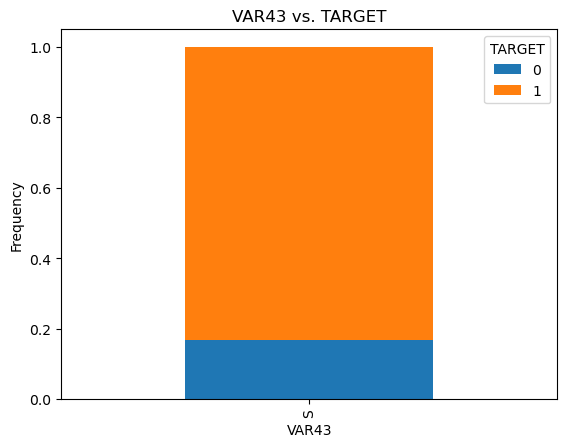

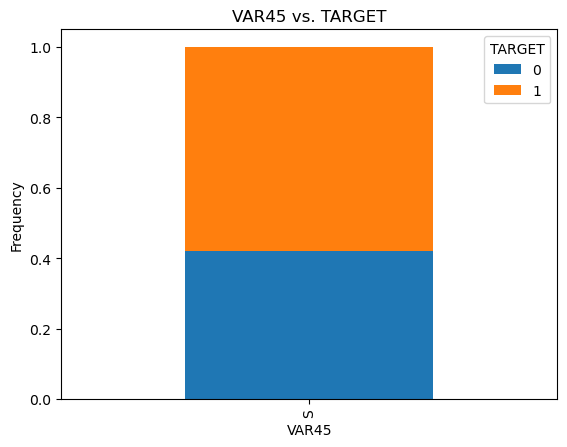

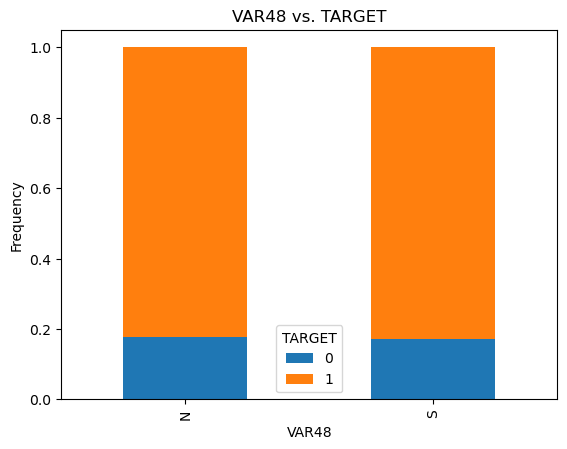

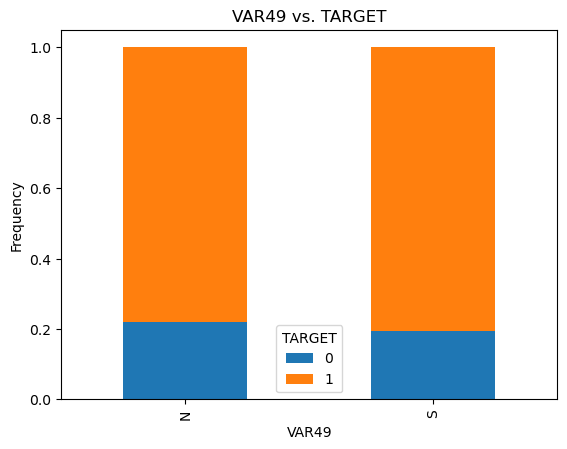

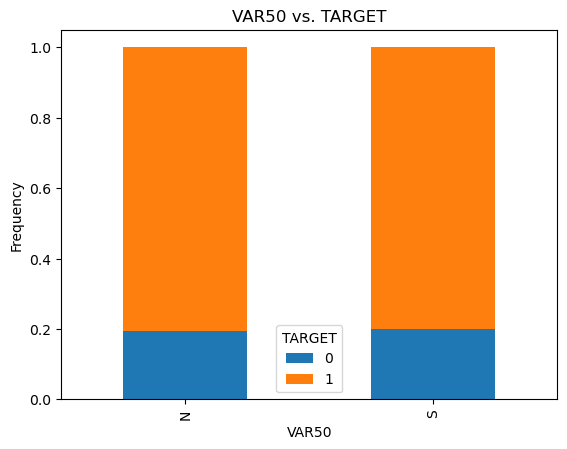

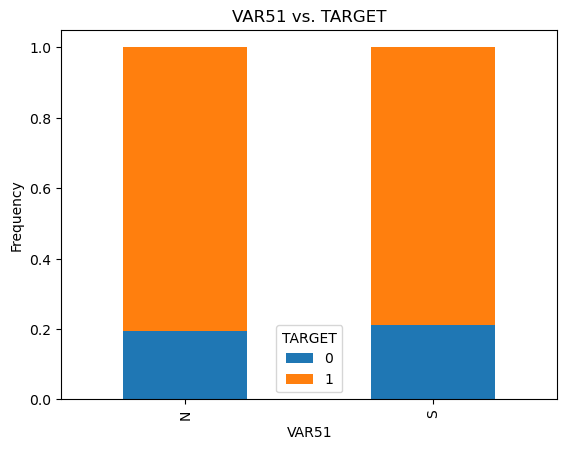

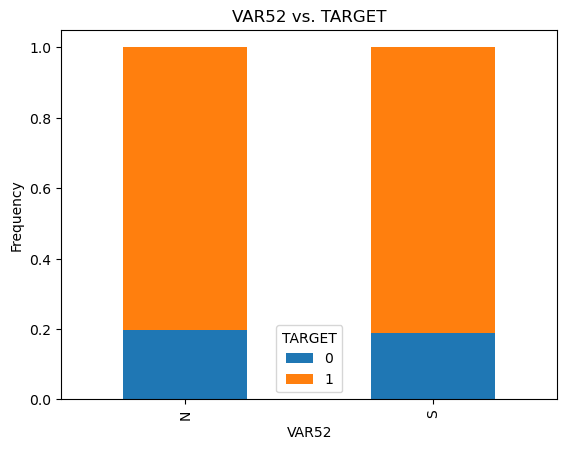

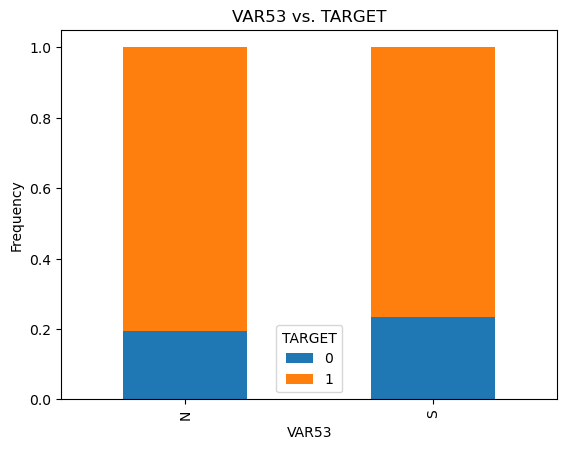

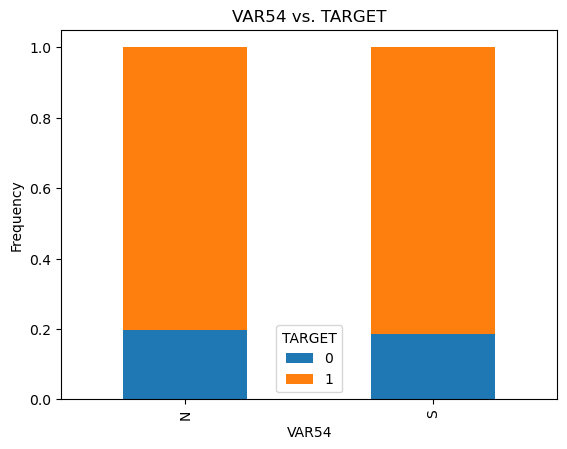

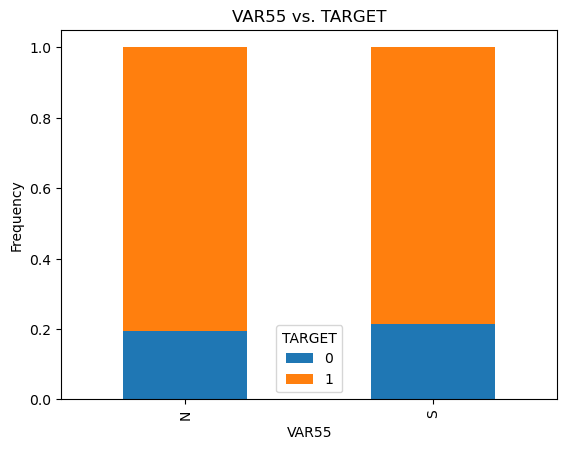

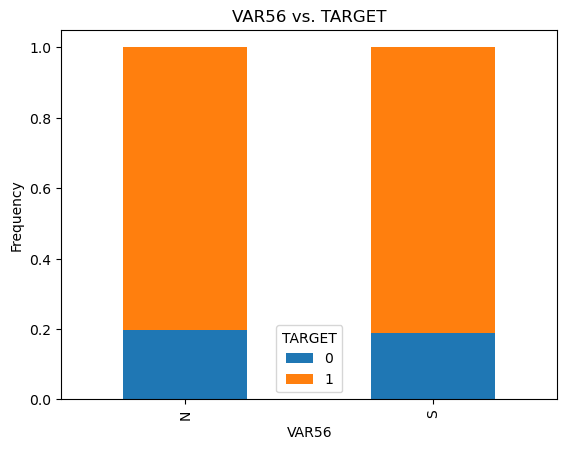

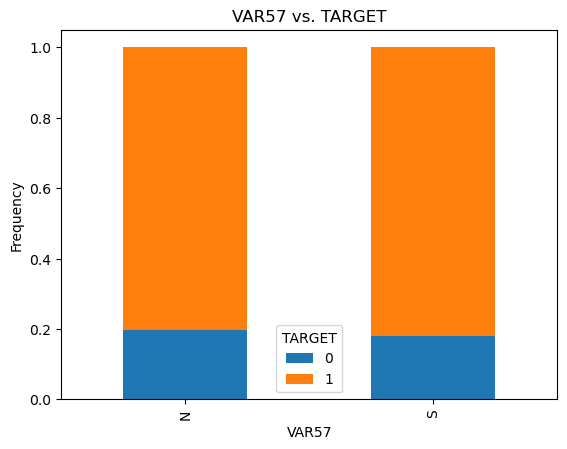

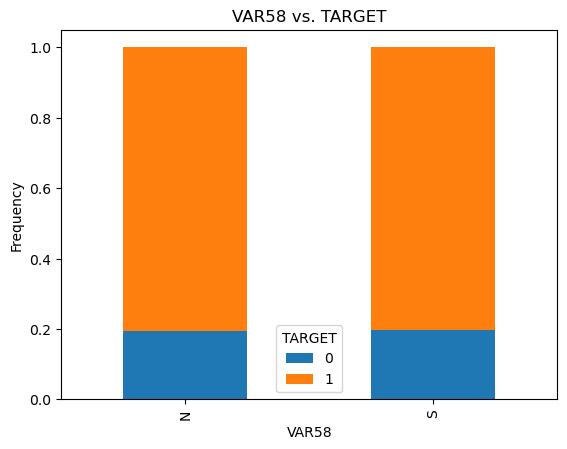

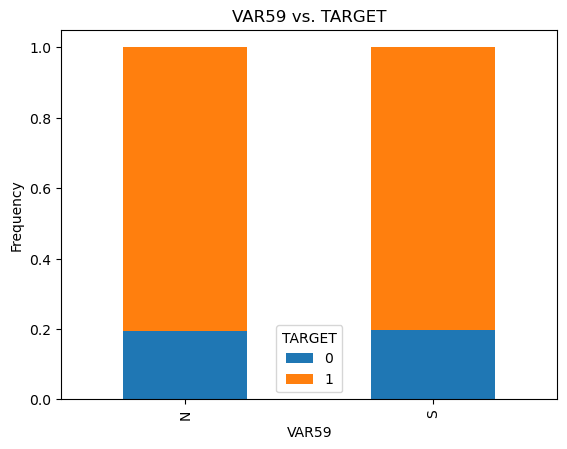

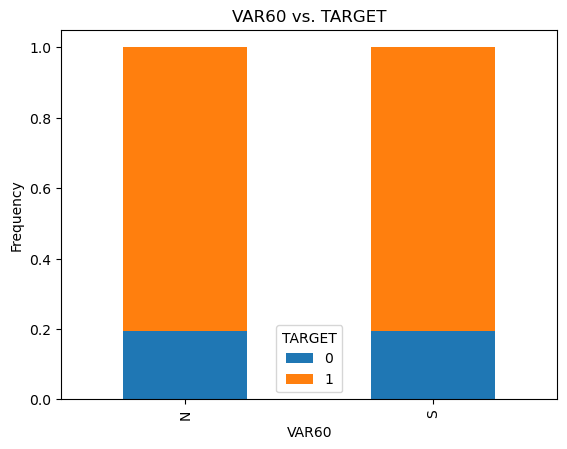

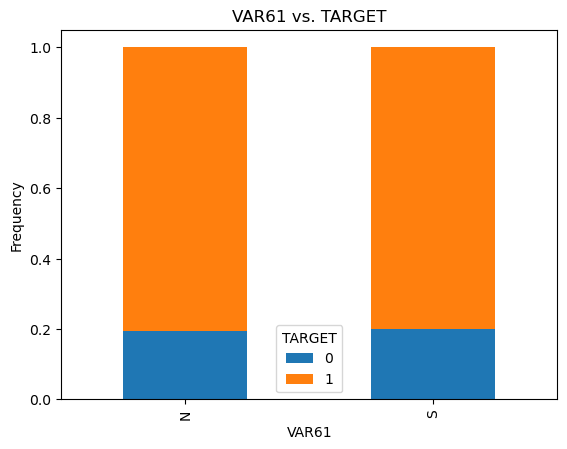

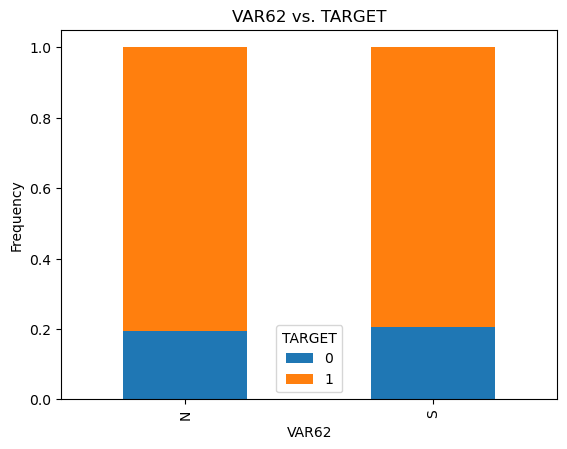

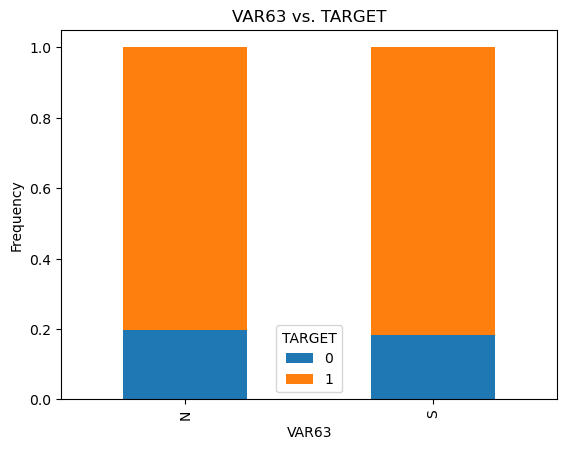

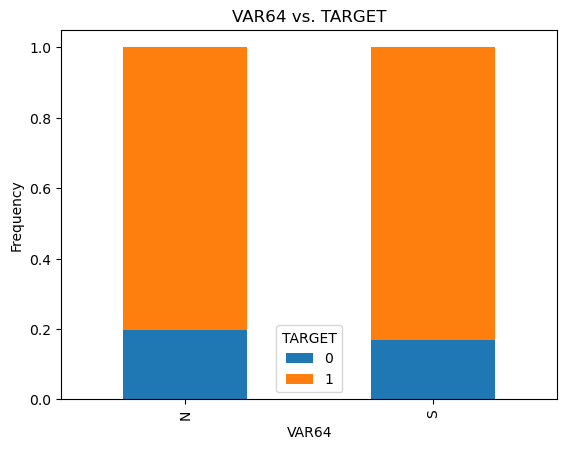

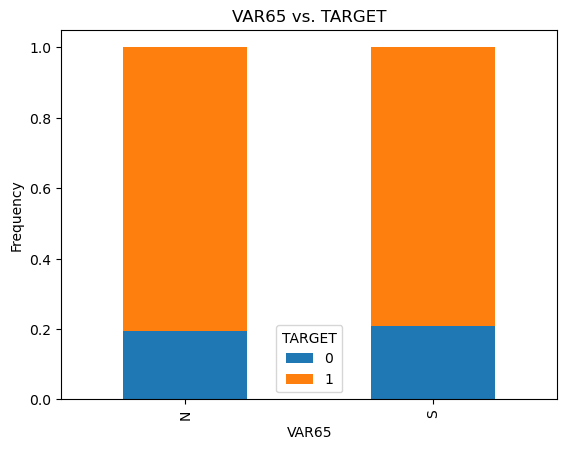

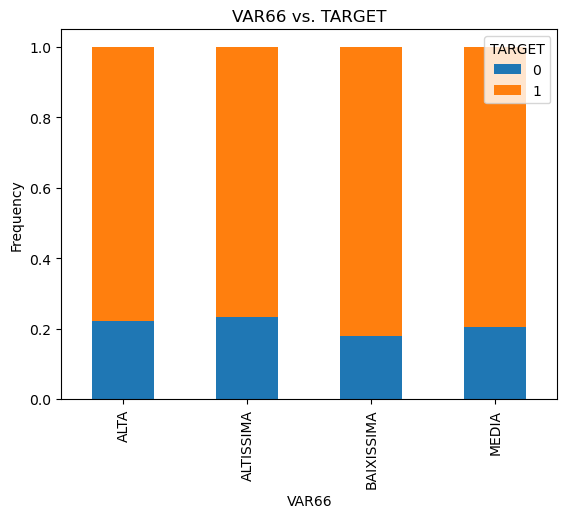

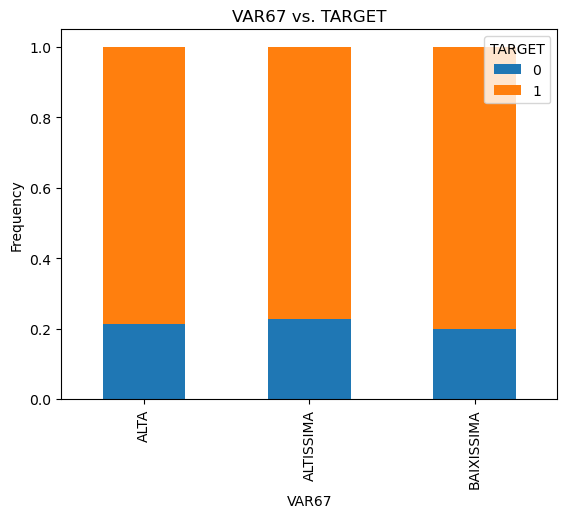

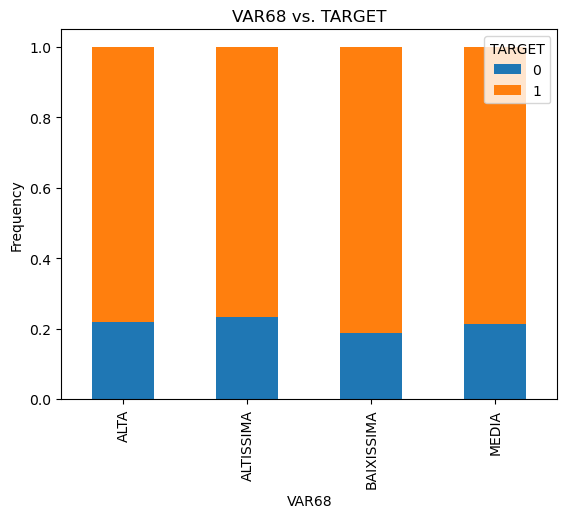

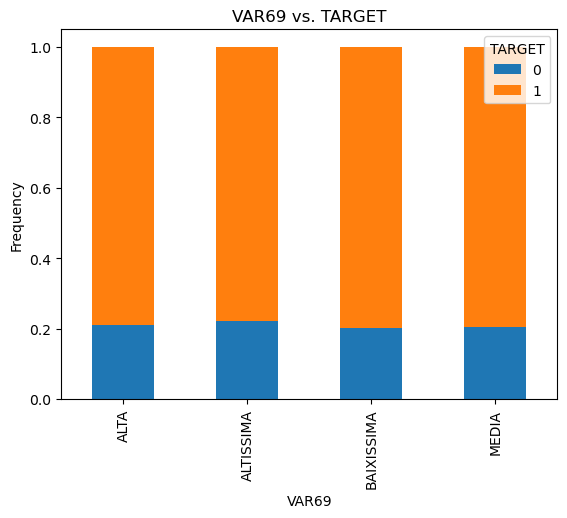

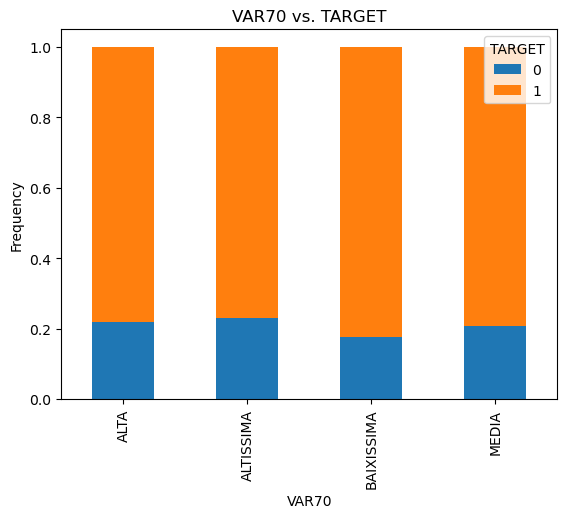

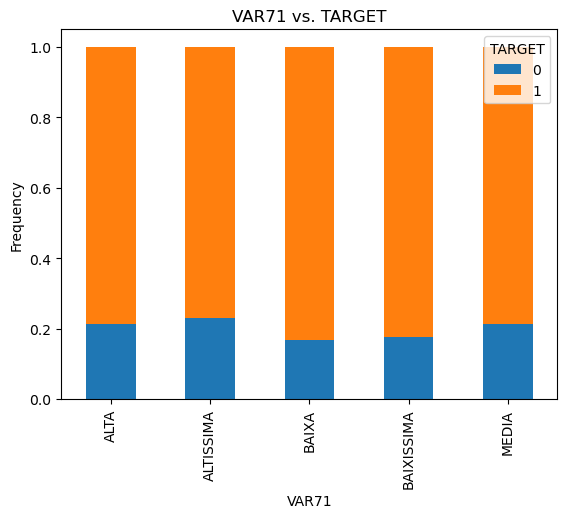

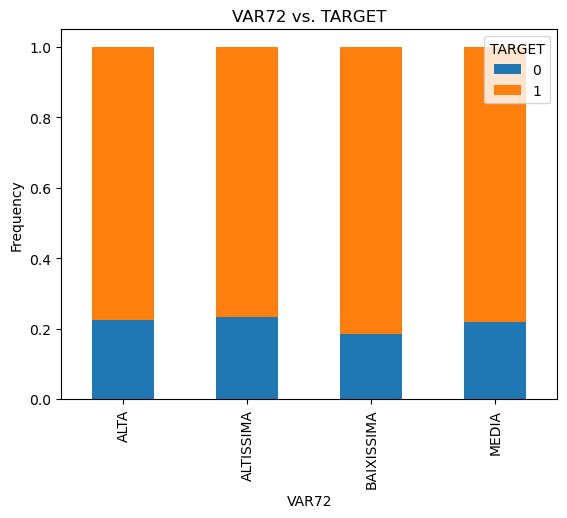

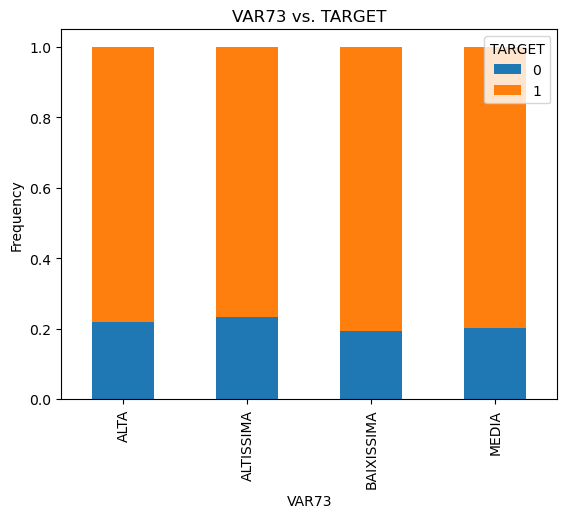

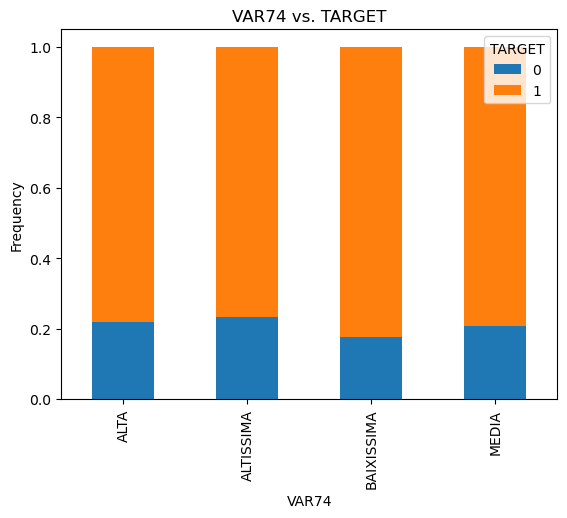

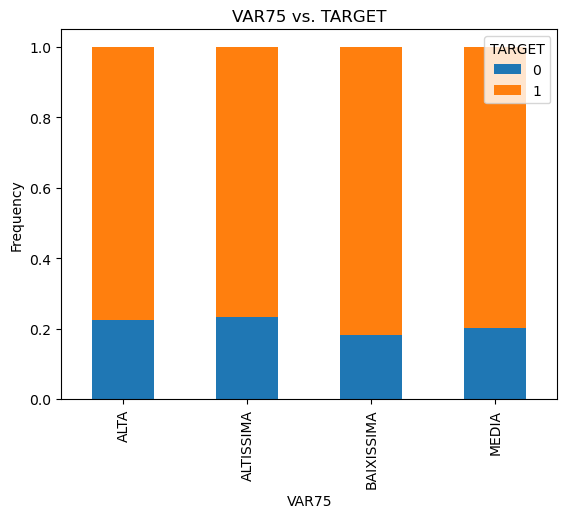

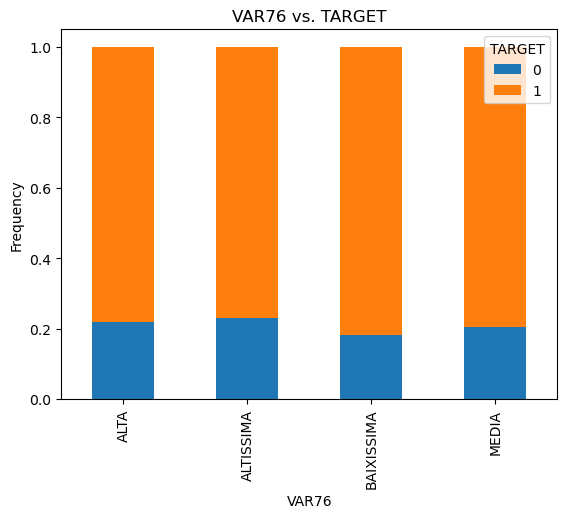

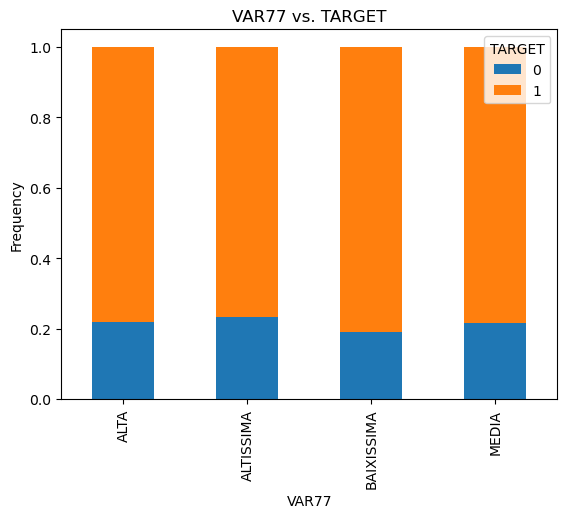

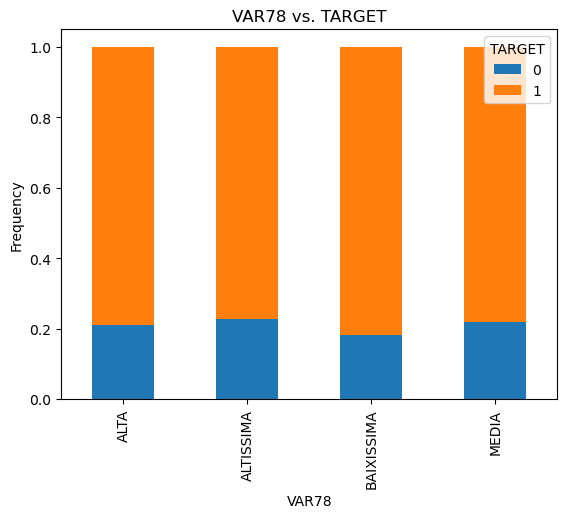

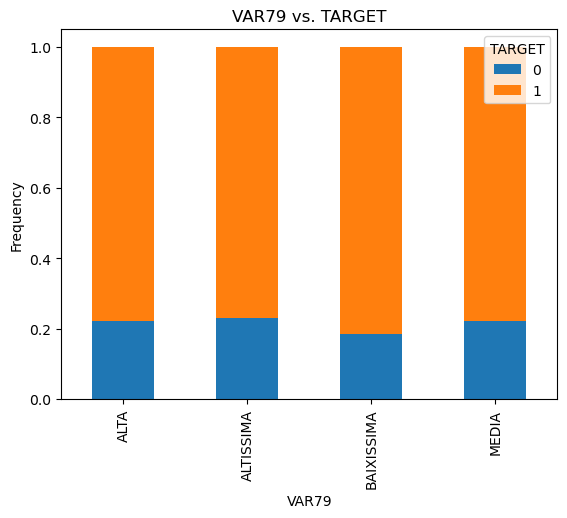

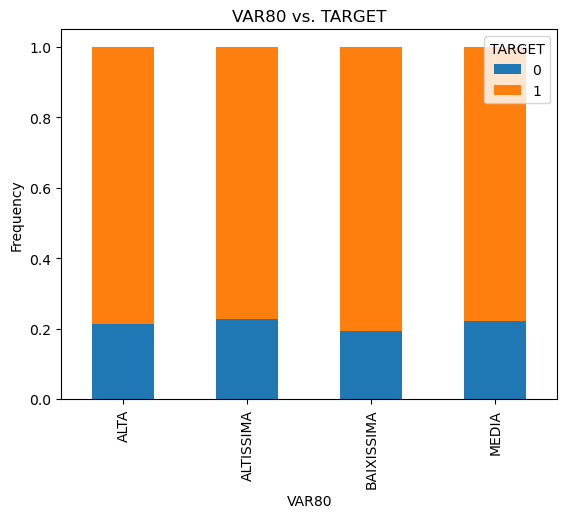

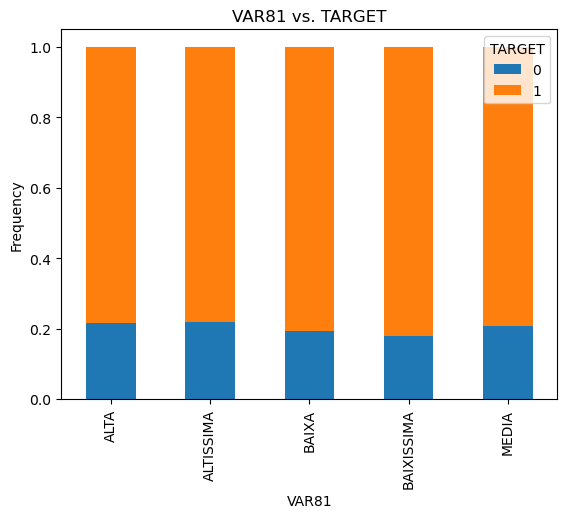

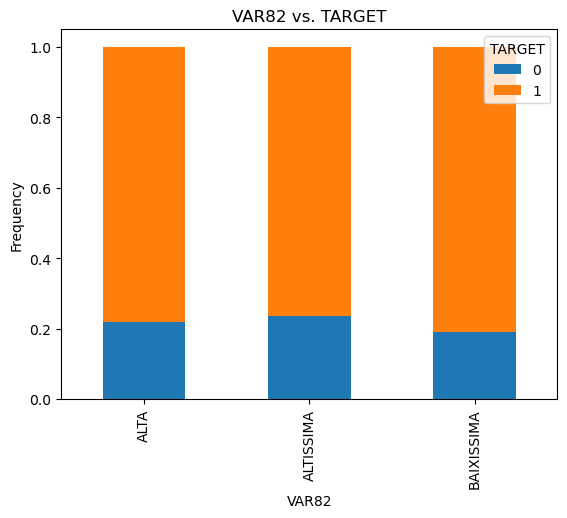

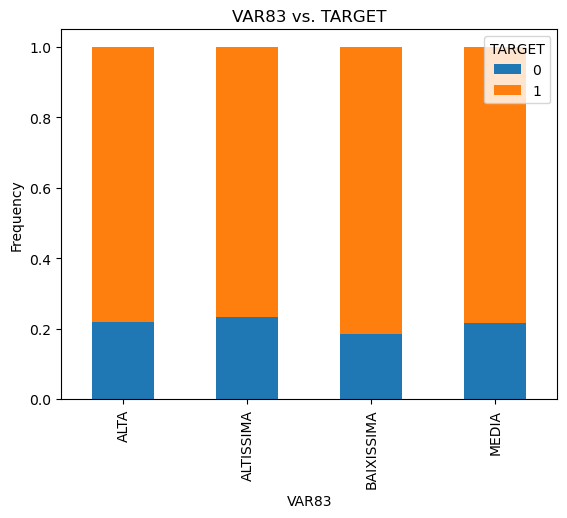

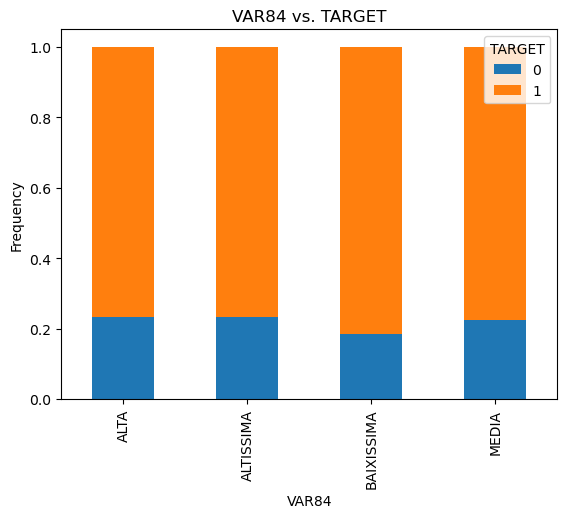

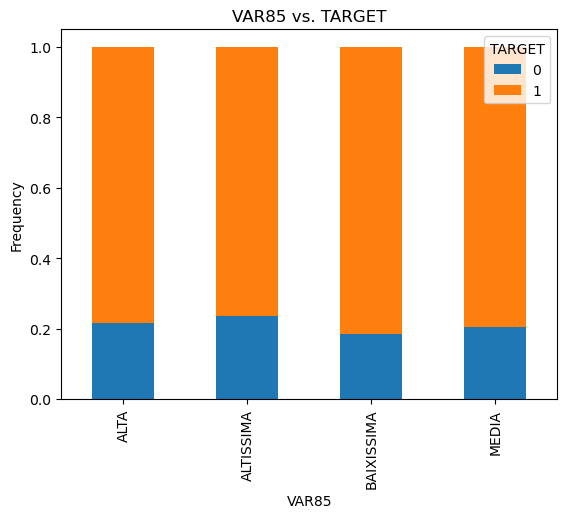

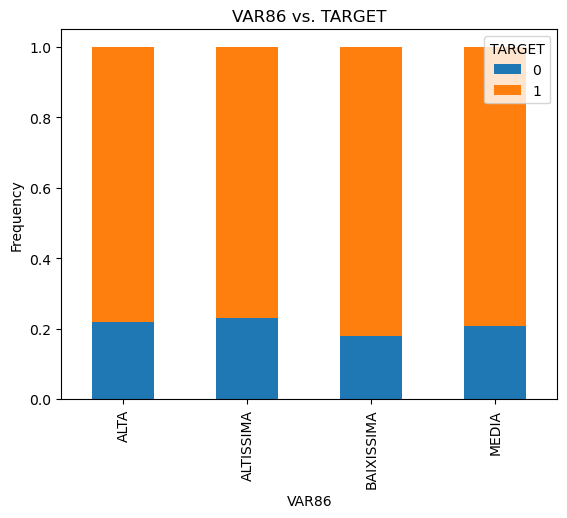

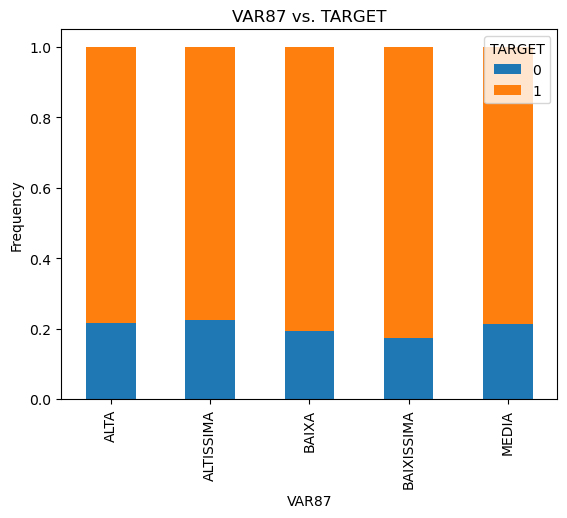

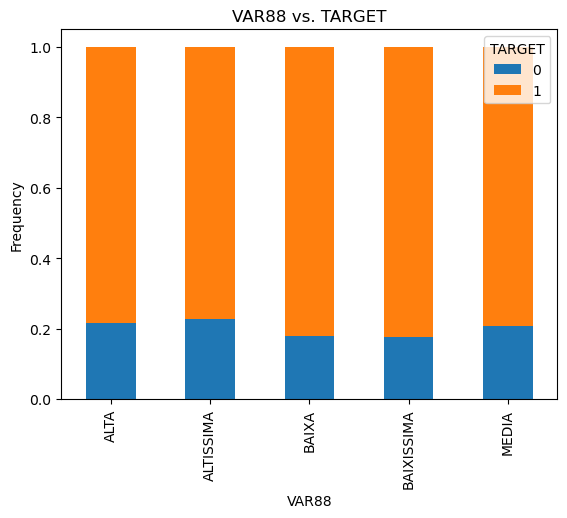

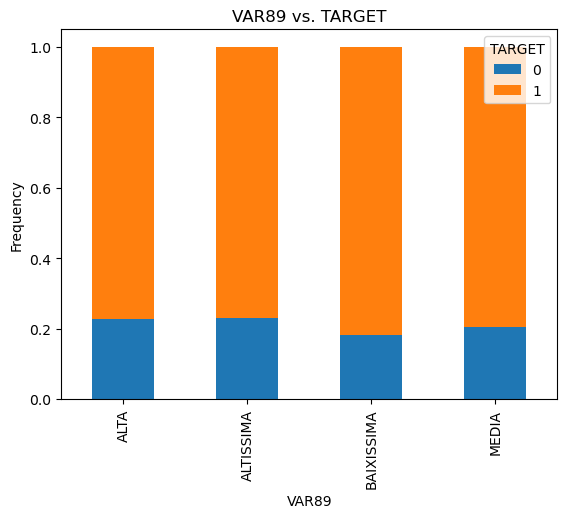

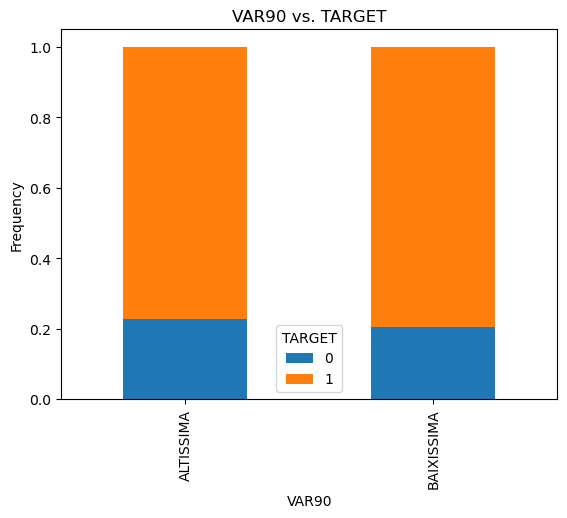

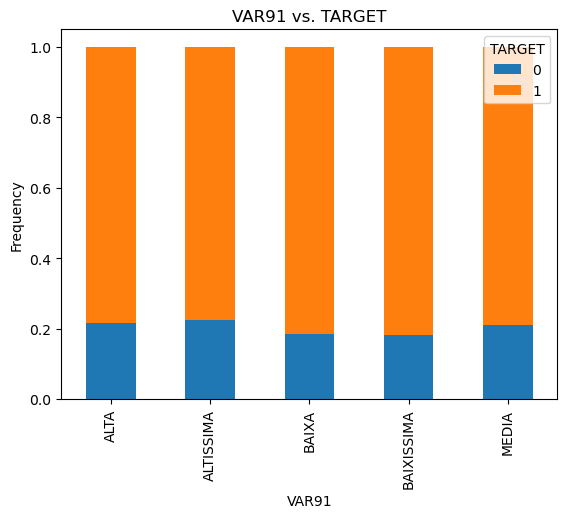

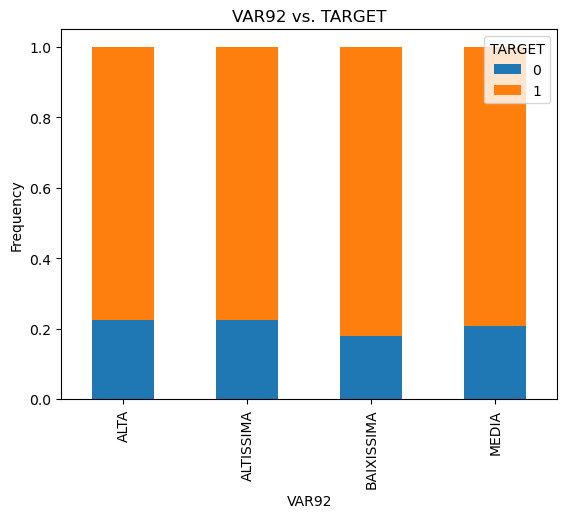

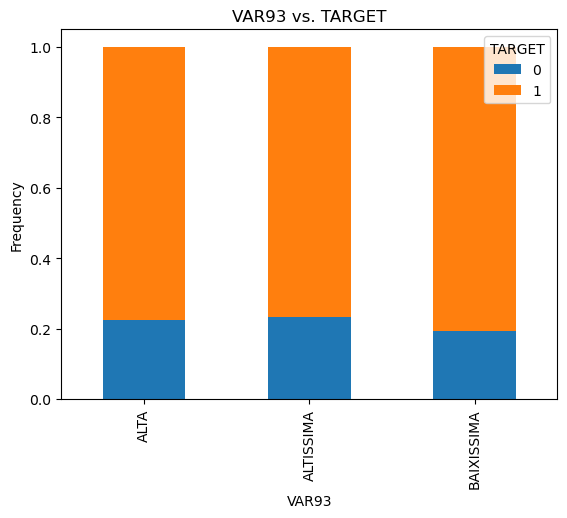

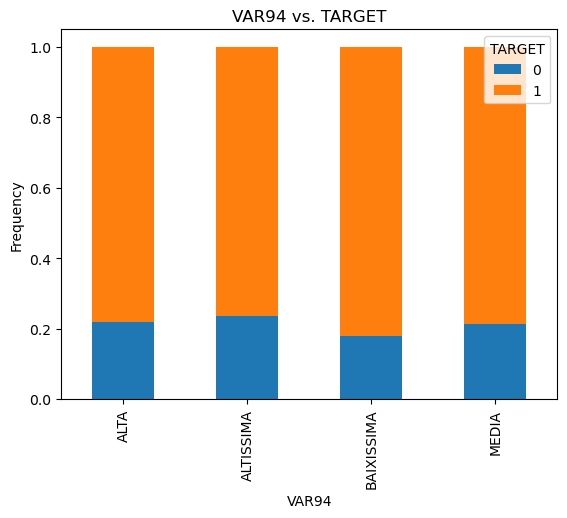

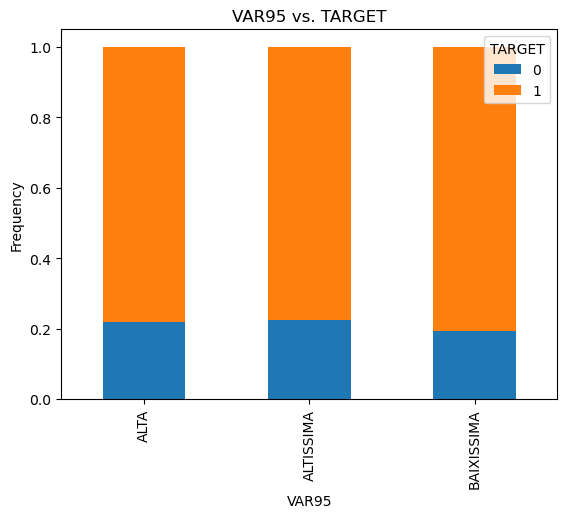

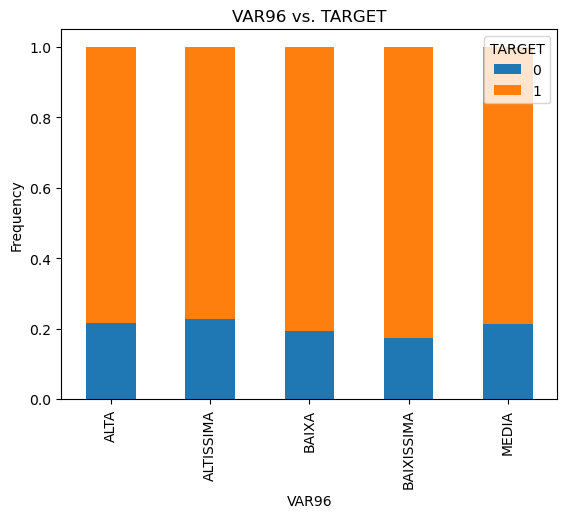

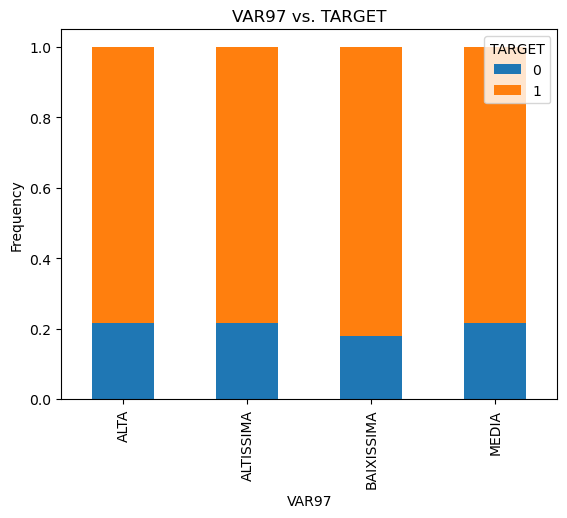

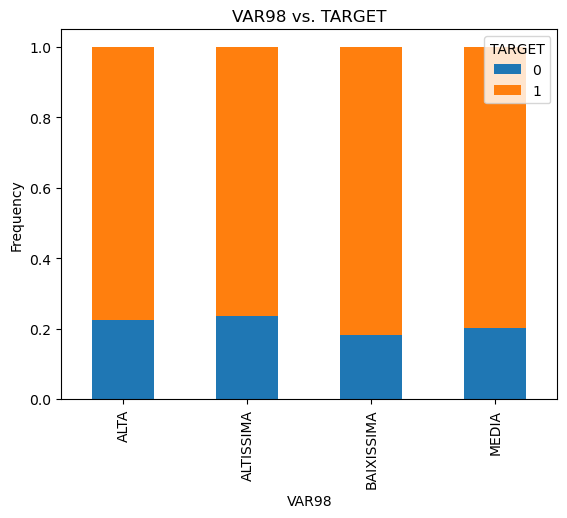

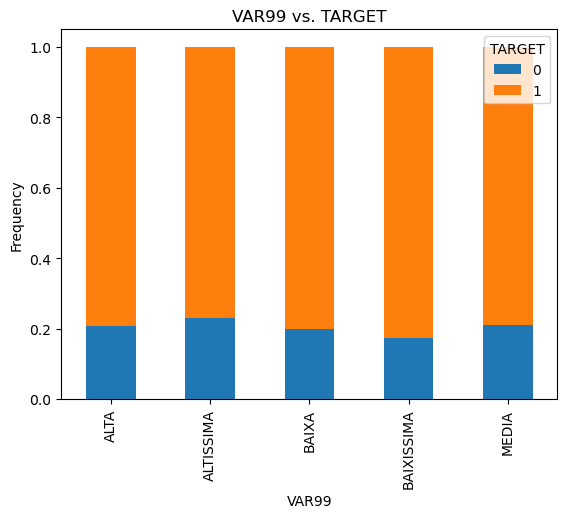

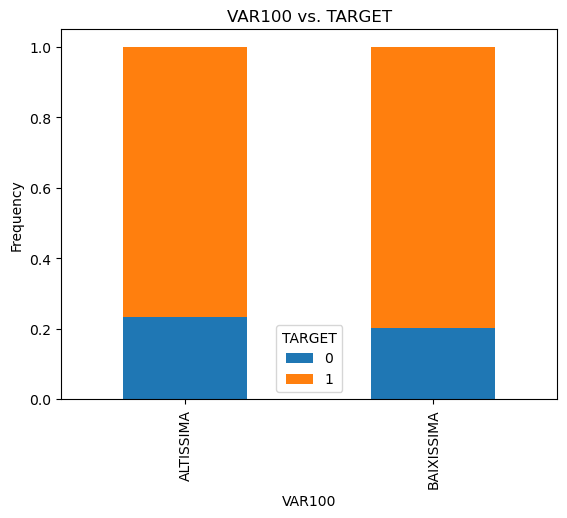

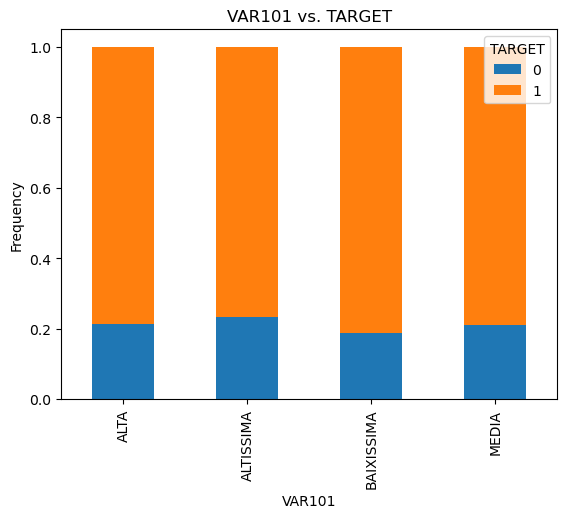

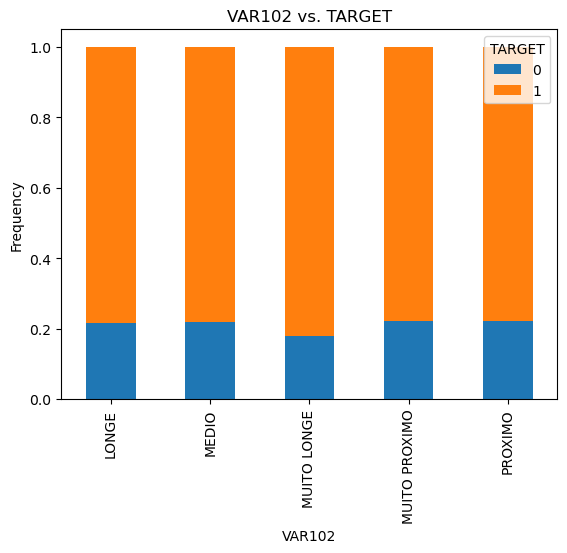

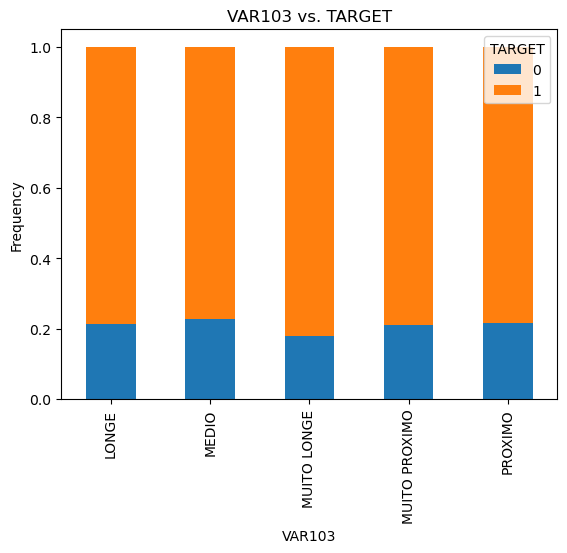

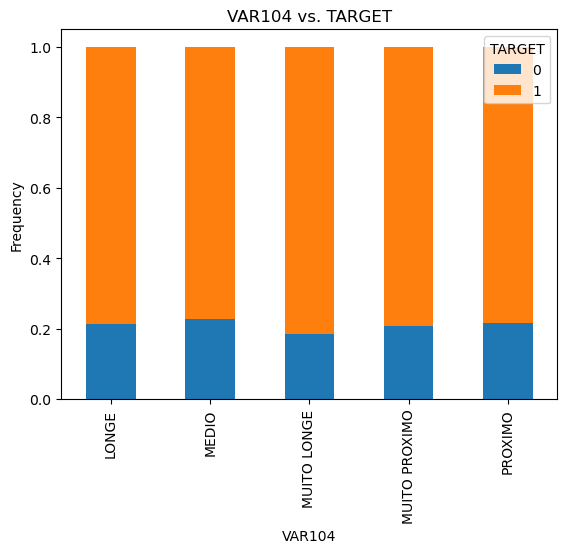

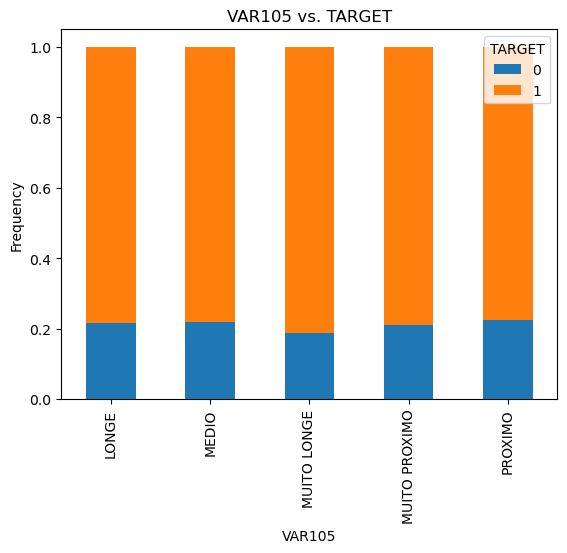

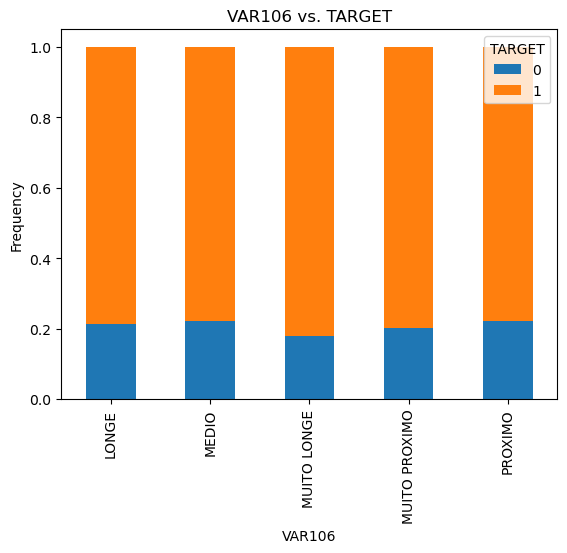

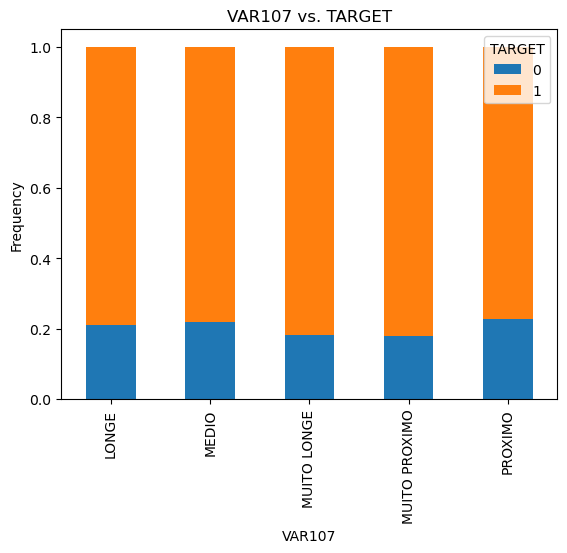

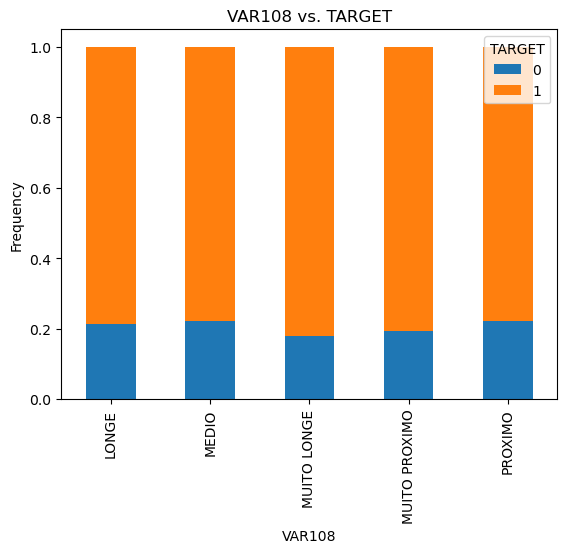

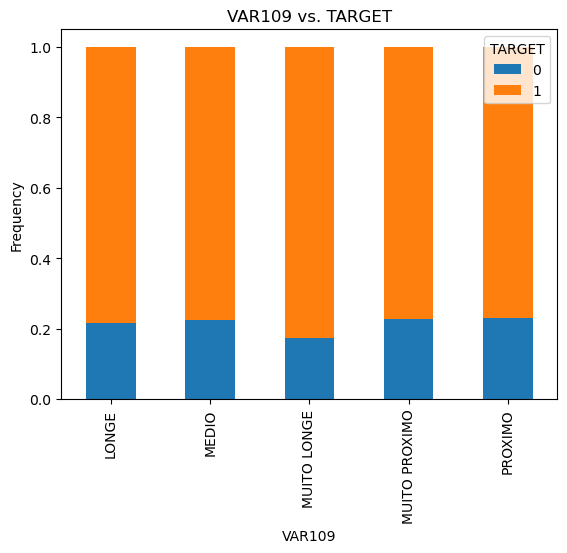

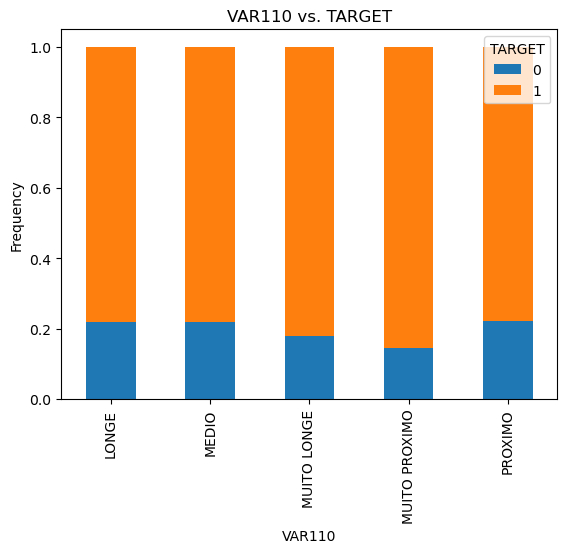

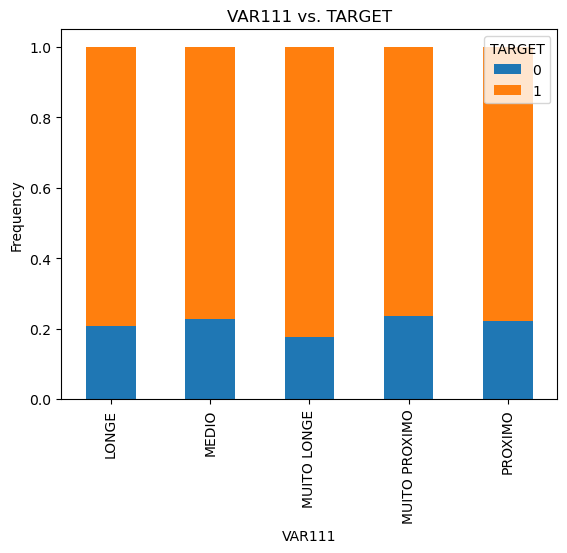

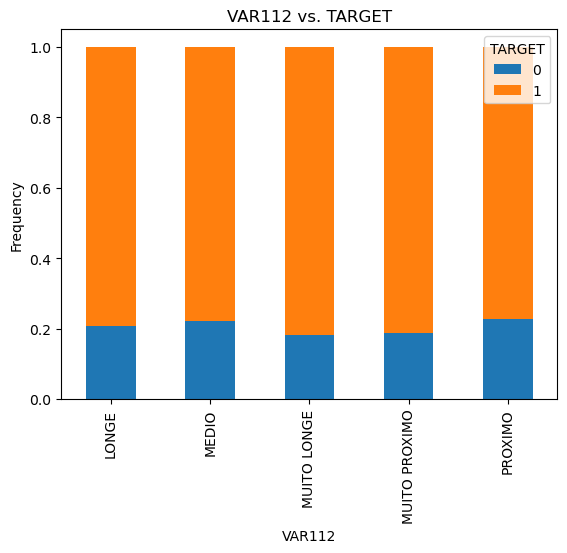

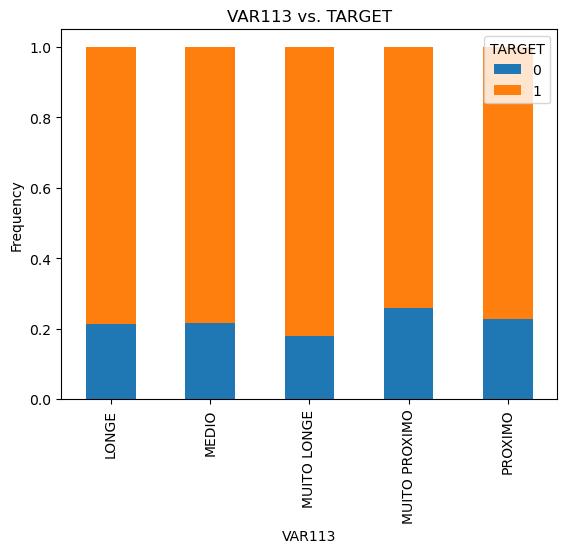

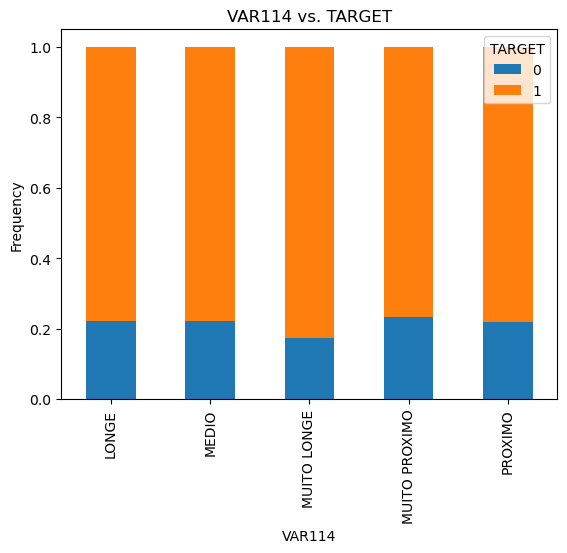

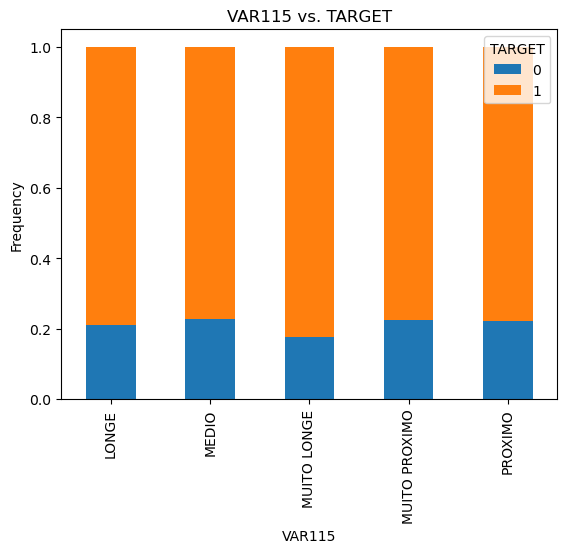

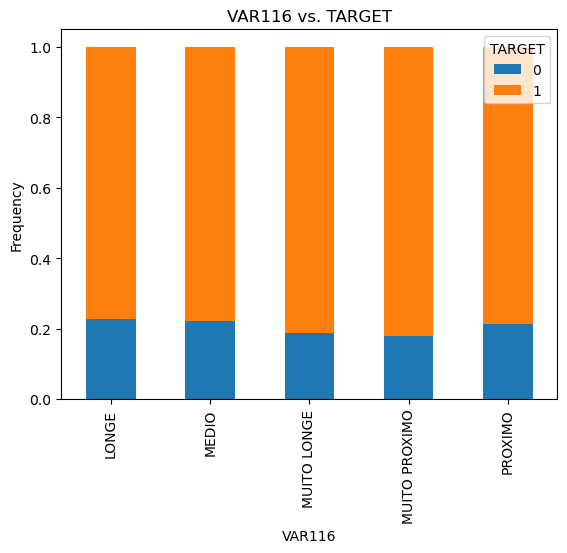

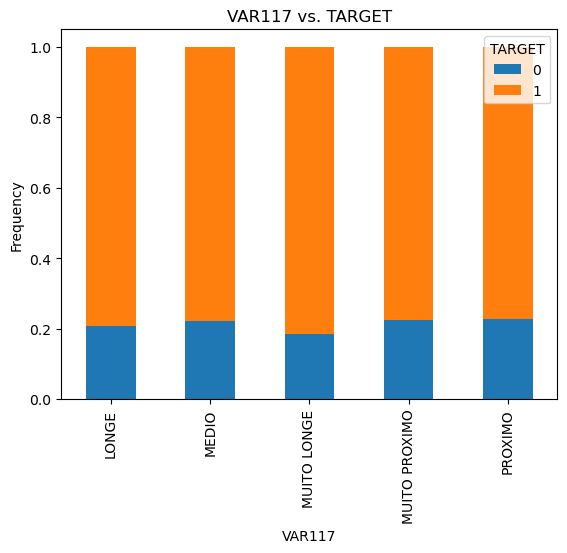

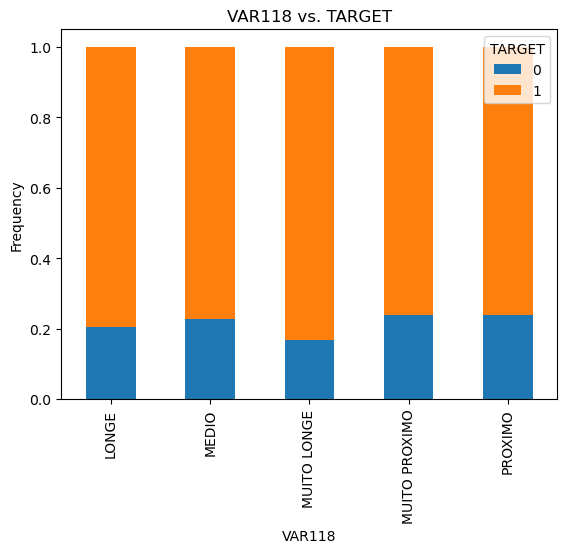

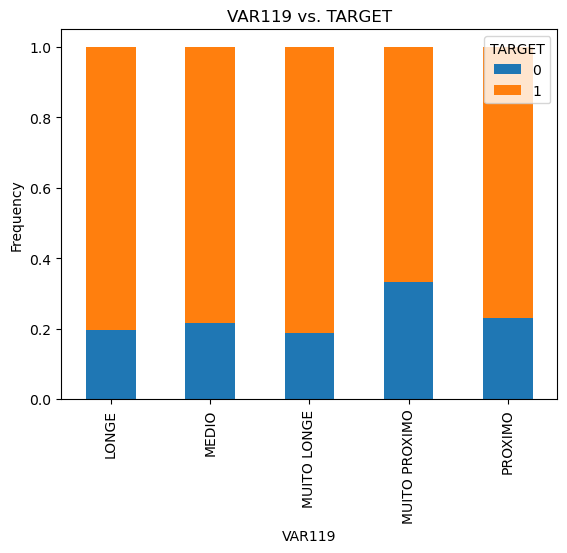

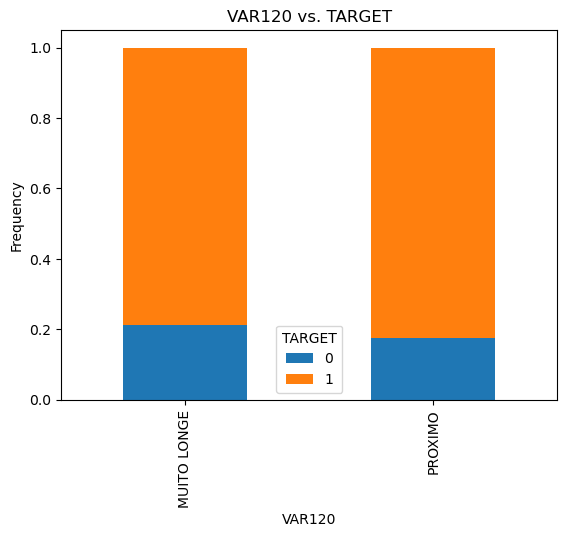

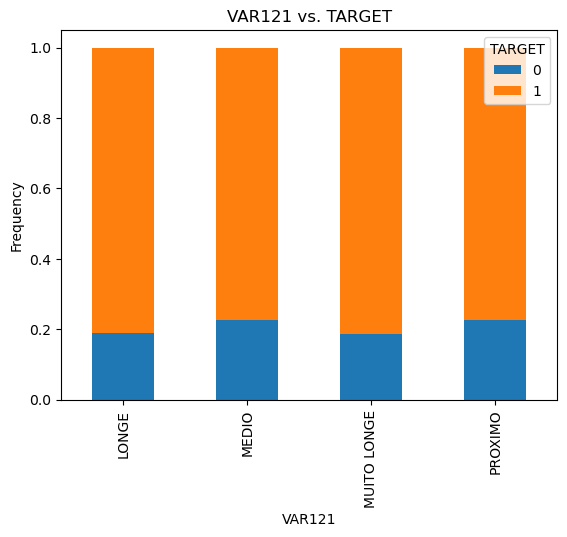

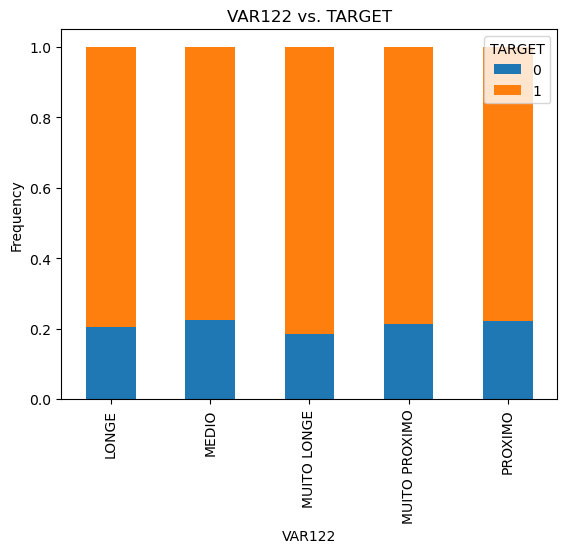

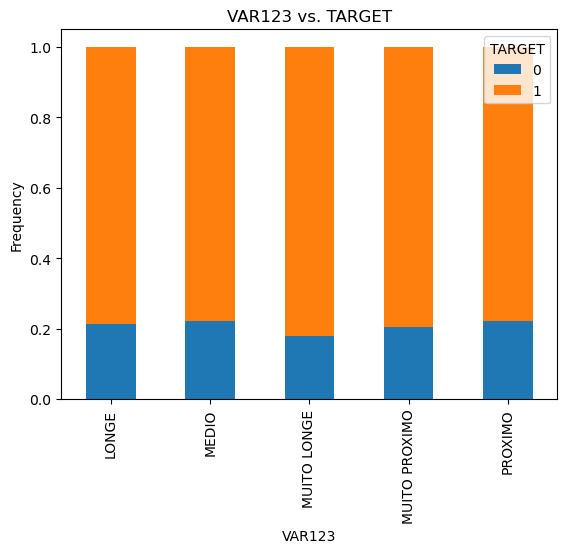

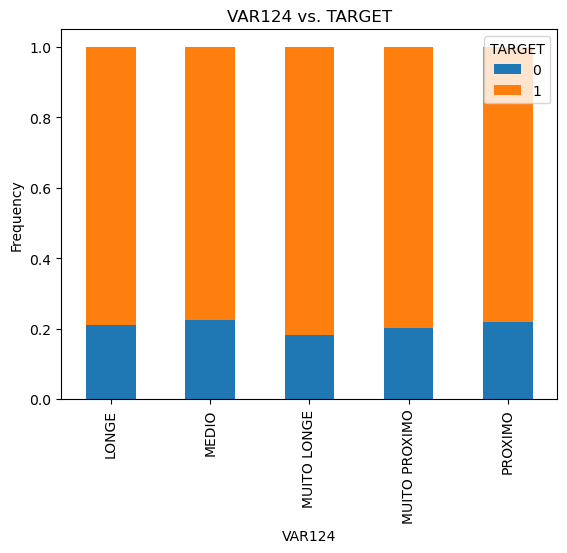

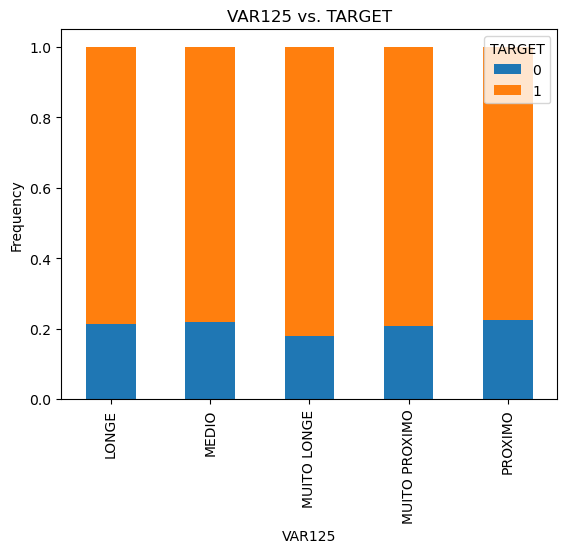

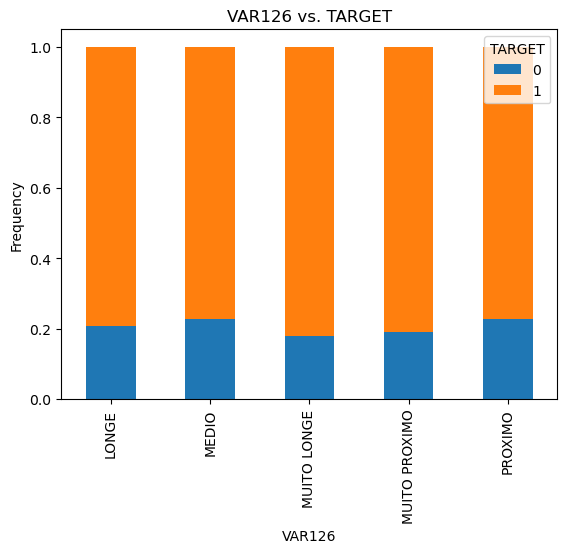

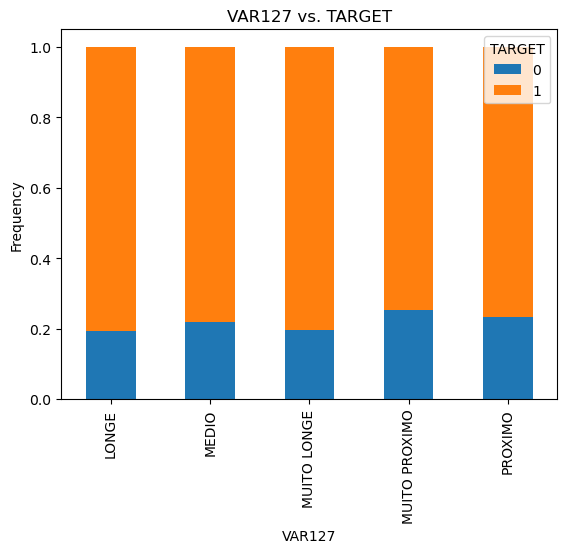

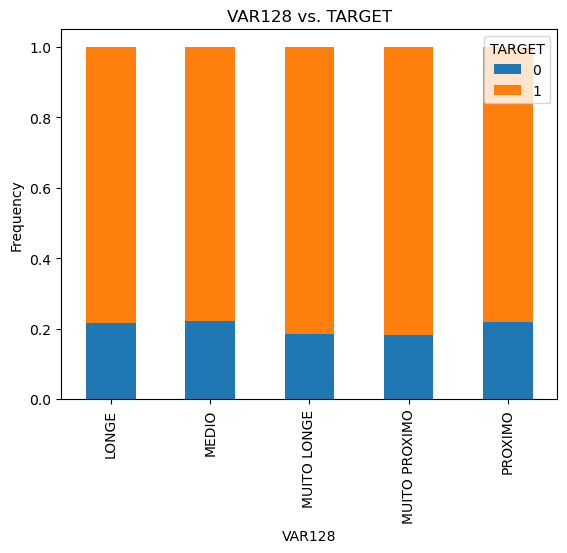

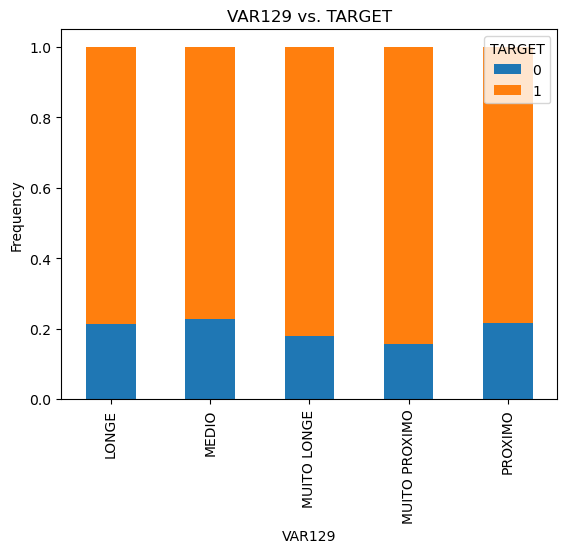

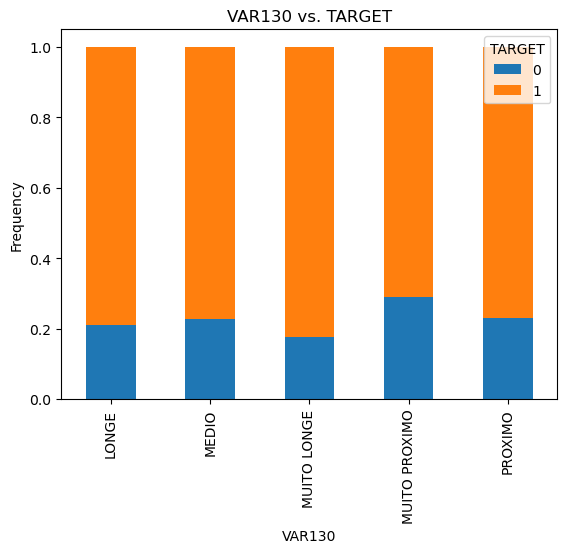

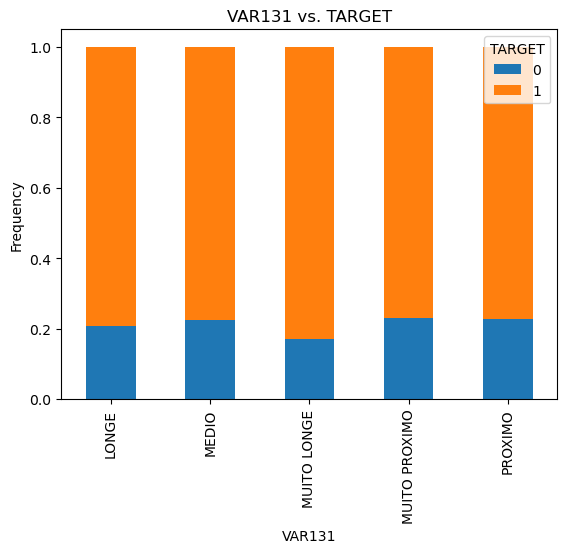

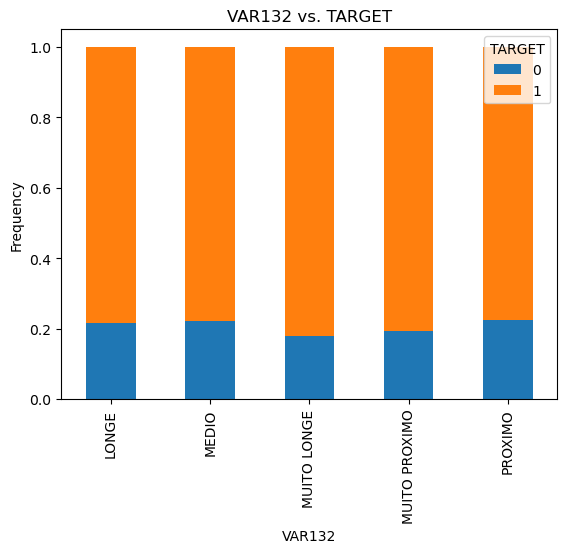

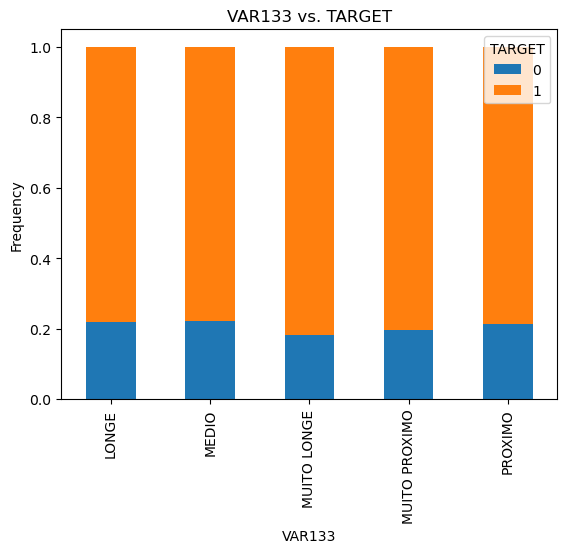

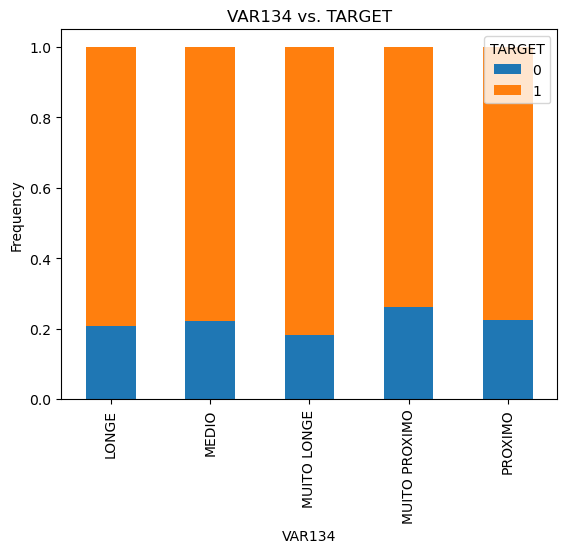

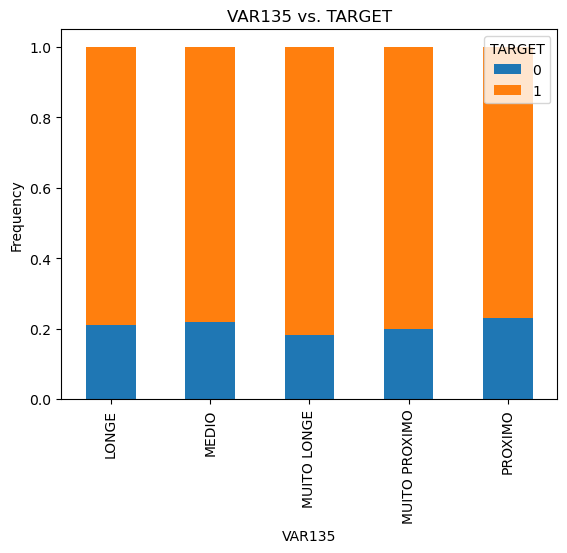

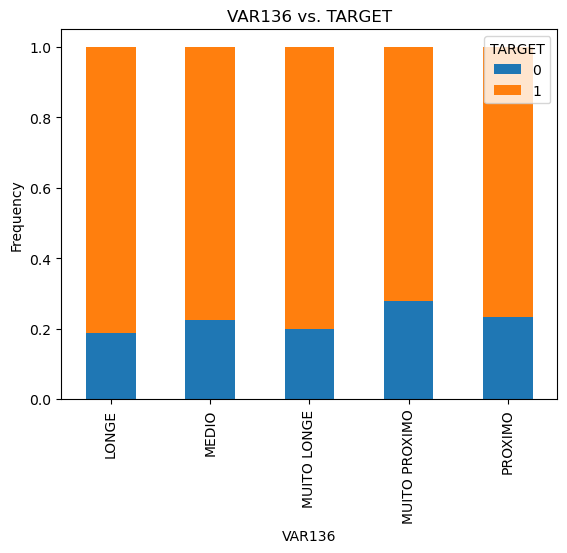

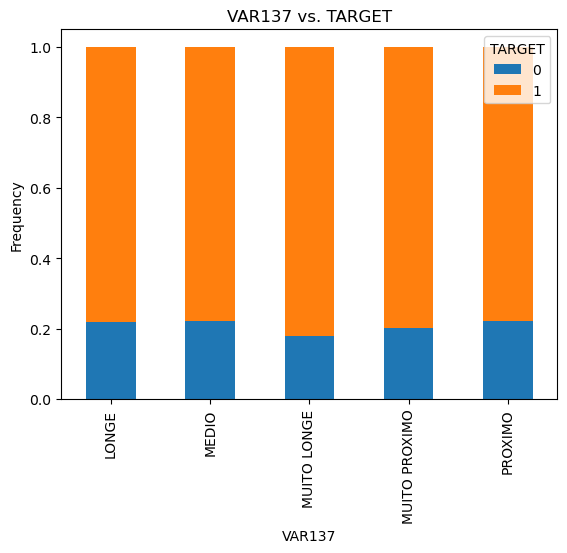

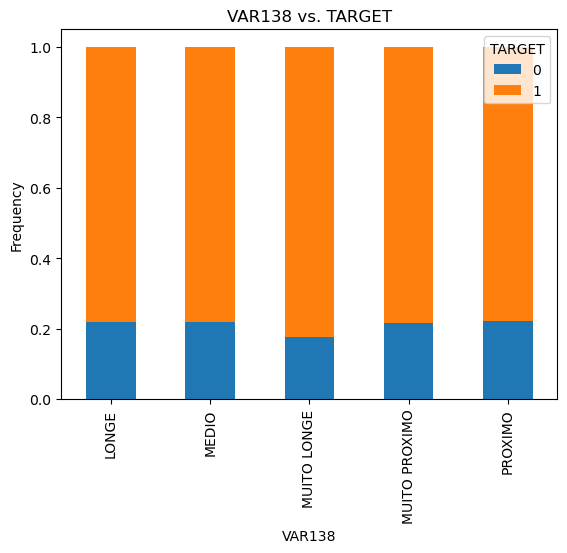

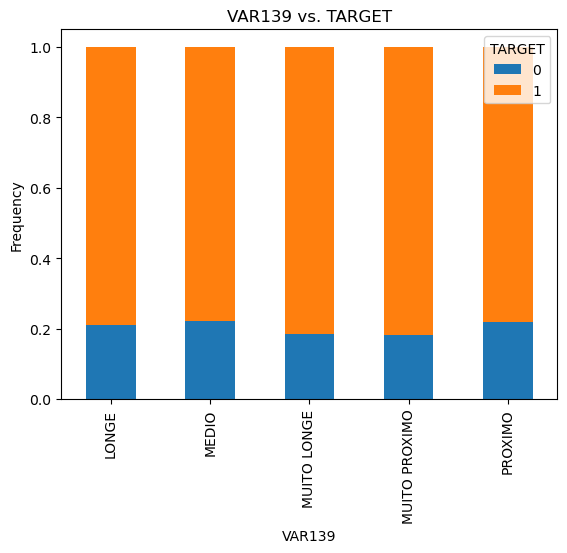

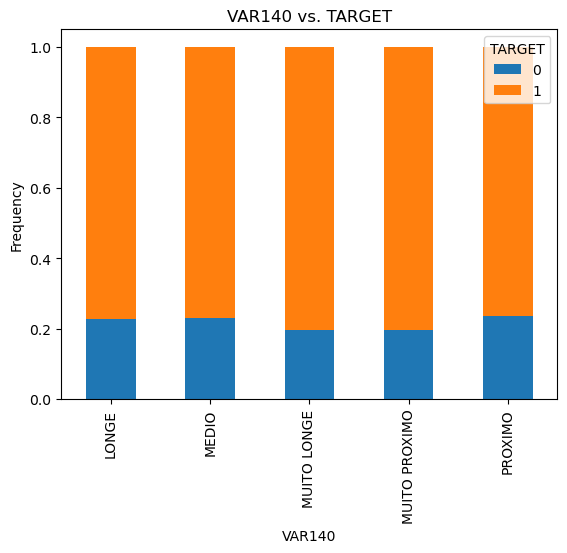

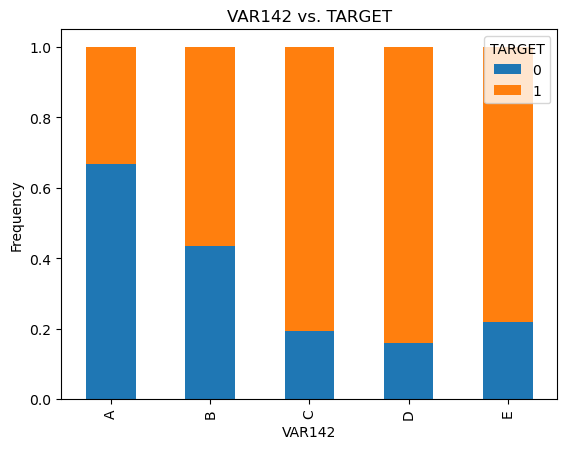

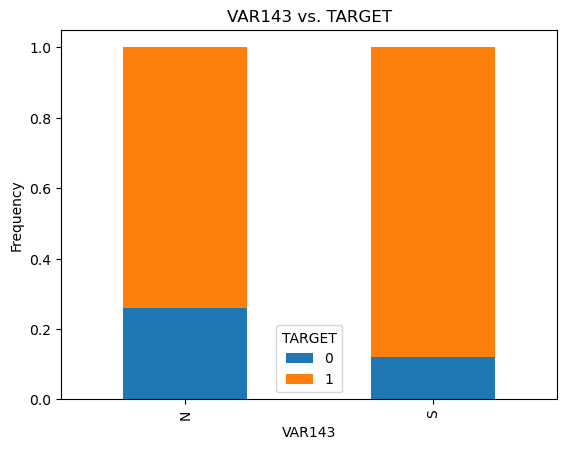

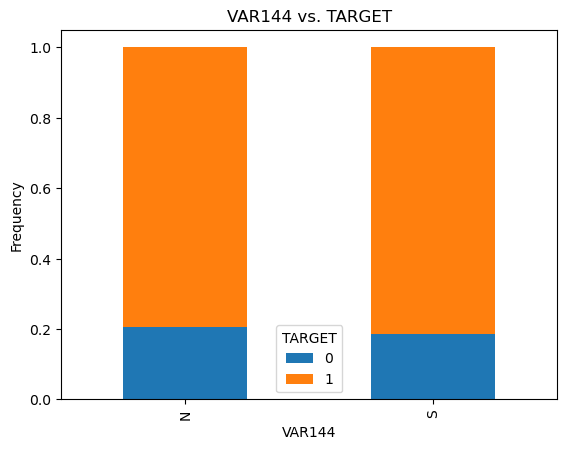

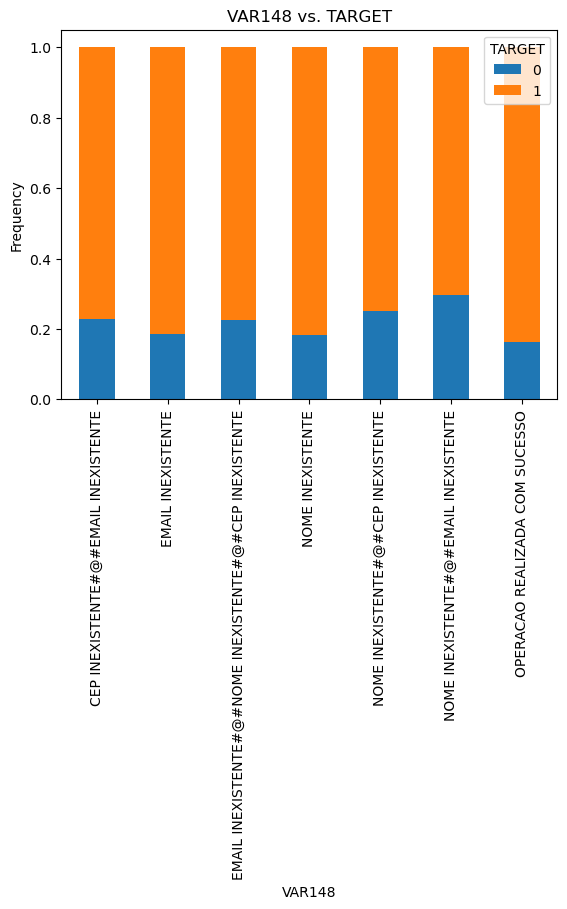

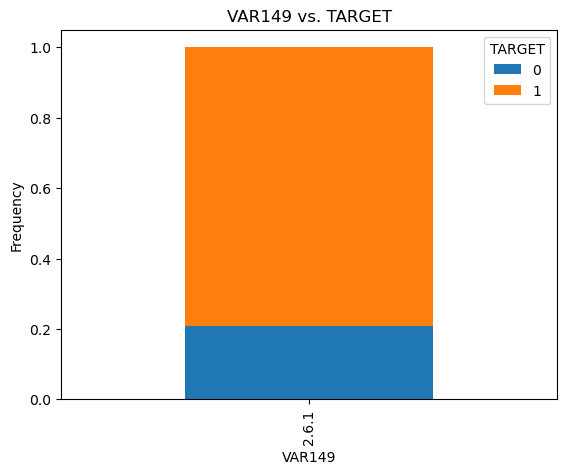

In [37]:
#Plot a stacked bar chart showing the relationship between the categorical features and the target

for feature in categorical_features:
    ctab = pd.crosstab(df[feature], df['TARGET'])
    ctab_relative = ctab.div(ctab.sum(axis=1), axis=0)
    ctab_relative.plot.bar(stacked=True)
    plt.title(feature + ' vs. TARGET')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='TARGET')
    plt.show()

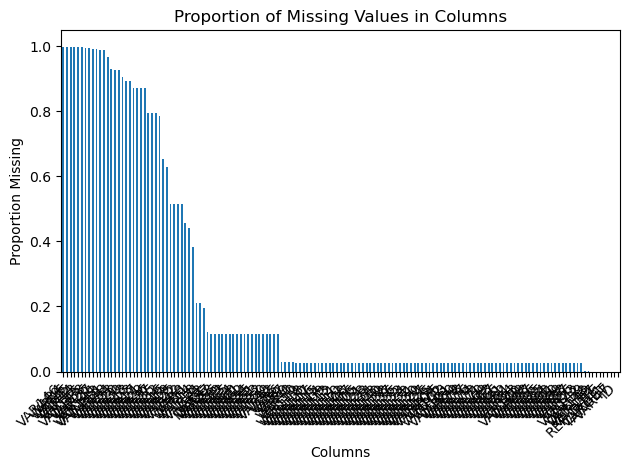

In [38]:
# Calculate the proportion of missing values for each column in the DataFrame
missing_proportions = (df.isna().sum() / len(df))

# Sort the missing value proportions in descending order and plot as a bar chart
ax = missing_proportions.sort_values(ascending=False).plot.bar()

# Set the title and labels for the plot
plt.title('Proportion of Missing Values in Columns')  # Set the plot title
plt.xlabel('Columns')                               # Set the x-axis label
plt.ylabel('Proportion Missing')                     # Set the y-axis label

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Display the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

### 2. Pré-processamento & Treinamento

In [39]:
numerical_features

num_cols_ = [
    c for c in numerical_features if c
    not in ['TARGET']]

total_features = num_cols_ + categorical_features

total_features

['IDADE',
 'VAR6',
 'VAR7',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR37',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR44',
 'VAR46',
 'VAR47',
 'VAR141',
 'VAR145',
 'VAR146',
 'VAR147',
 'VAR2',
 'VAR4',
 'VAR5',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR38',
 'VAR43',
 'VAR45',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'V

#### 2.1. Processor

In [40]:
numeric_transformer = Pipeline(
    steps=[
        ("inputer", SimpleImputer(strategy='median')),
        ("scaler", MinMaxScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("indicator", AddMissingIndicator()),
        ("encoder", TableVectorizer(auto_cast=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_include=np.number)),
        ("cat", categorical_transformer, selector(dtype_include="category"))
    ]
)

In [41]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1a24040>),
                                ('cat',
                                 Pipeline(steps=[('indicator',
                                                  AddMissingIndicator()),
                                                 ('encoder',
                                                  TableVectorizer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1f60a90>)])

#### 2.2. Baseline Classifier

In [42]:
clf_rf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier())]
)

#### 2.3. Model Validation Framework

In [43]:
df_train = pd.read_csv('../datasets/credit_01/train.gz', compression='gzip')
df_test = pd.read_csv('../datasets/credit_01/test.gz', compression='gzip')

/tmp/ipykernel_245/1621909560.py:2: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('../datasets/credit_01/test.gz', compression='gzip')


In [44]:
print(df_train.shape)
print(df_test.shape)

(101128, 151)
(49810, 151)


In [45]:
X_train = df_train[total_features]
y_train = df_train['TARGET']

X_test = df_test[total_features]
y_test = df_test['TARGET']

#### 2.4. Training

In [46]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1a24040>),
                                                 ('cat',
                                                  Pipeline(steps=[('indicator',
                                                                   AddMissingIndicator()),
                                                                  ('encoder',
                                                                   TableVectorizer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1f60a90>)])),
                ('classifier', RandomForestClassifier())])

#### 2.5. LGBM


In [47]:
lgbm = LGBMClassifier()


clf_lgbm = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", lgbm)]
)

In [48]:
clf_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 80130, number of negative: 20998
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5259
[LightGBM] [Info] Number of data points in the train set: 101128, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792362 -> initscore=1.339223
[LightGBM] [Info] Start training from score 1.339223


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1a24040>),
                                                 ('cat',
                                                  Pipeline(steps=[('indicator',
                                                                   AddMissingIndicator()),
                                                                  ('encoder',
                                                                   TableVectorizer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1f60a90>)])),
                ('classifier', LGBMClassifier())])

#### 2.6. LGBM Tuning

In [49]:
rs_params = {
    'boosting_type': ['gbdt'],
    'num_leaves': [20, 30, 40, 50],  # Maximum number of leaves in one tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size at each iteration
    'n_estimators': [50, 100, 200, 300],  # Number of boosting rounds (trees)
    'max_depth': [5, 10, 15],  # Maximum depth of tree (-1 for no limit)
    'min_child_samples': [10, 20, 30],  # Minimum number of samples per leaf
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting trees
    'reg_alpha': [0.0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.5],  # L2 regularization term on weights
}

rs_cv = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=20, verbose=1)

In [50]:
clf_lgbm_tunning = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", rs_cv)]
)

In [51]:
clf_lgbm_tunning

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1a24040>),
                                                 ('cat',
                                                  Pipeline(steps=[('indicator',
                                                                   AddMissingIndicator()),
                                                                  ('encoder',
                                                                   TableVectorizer())]),
                                                  <sklearn.compose....
                 RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20,
                                    param_distributions={'boosting_type': ['gbdt'],
                                                         'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [5, 10,
                                                                       15],
                                                         'min_child_samples': [10,
                                                                               20,
                                                                               30],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          200,
                                                                          300],
                                                         'num_leaves': [20, 30,
                                                                        40,
                                                                        50],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.5],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.5],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    verbose=1))])

In [52]:
clf_lgbm_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 64104, number of negative: 16798
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5212
[LightGBM] [Info] Number of data points in the train set: 80902, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.792366 -> initscore=1.339247
[LightGBM] [Info] Start training from score 1.339247
[LightGBM] [Info] Number of positive: 64104, number of negative: 16798
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5218
[LightGBM] [Info] Number of data points in th

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f08e1a24040>),
                                                 ('cat',
                                                  Pipeline(steps=[('indicator',
                                                                   AddMissingIndicator()),
                                                                  ('encoder',
                                                                   TableVectorizer())]),
                                                  <sklearn.compose....
                 RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20,
                                    param_distributions={'boosting_type': ['gbdt'],
                                                         'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [5, 10,
                                                                       15],
                                                         'min_child_samples': [10,
                                                                               20,
                                                                               30],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          200,
                                                                          300],
                                                         'num_leaves': [20, 30,
                                                                        40,
                                                                        50],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.5],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.5],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    verbose=1))])

In [53]:
clf_lgbm_tunning[1].best_params_

{'subsample': 0.8,
 'reg_lambda': 0.0,
 'reg_alpha': 0.0,
 'num_leaves': 50,
 'n_estimators': 300,
 'min_child_samples': 30,
 'max_depth': 10,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8,
 'boosting_type': 'gbdt'}

## Avaliação Técnica

#### 3.1. Baseline

In [54]:
y_pred_rf = clf_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_rf

0.6555887649391029

#### 3.2. LGBM


In [55]:
y_pred_lgbm = clf_lgbm.predict_proba(X_test)[:, 1]
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)
roc_auc_lgbm

0.6853055714385861

#### 3.3. LGBM with Hyperparameter Tunning

In [56]:
y_pred_lgbm_tunning = clf_lgbm_tunning.predict_proba(X_test)[:, 1]
roc_auc_lgbm_tunning = roc_auc_score(y_test, y_pred_lgbm_tunning)
roc_auc_lgbm_tunning

0.6883310940271674

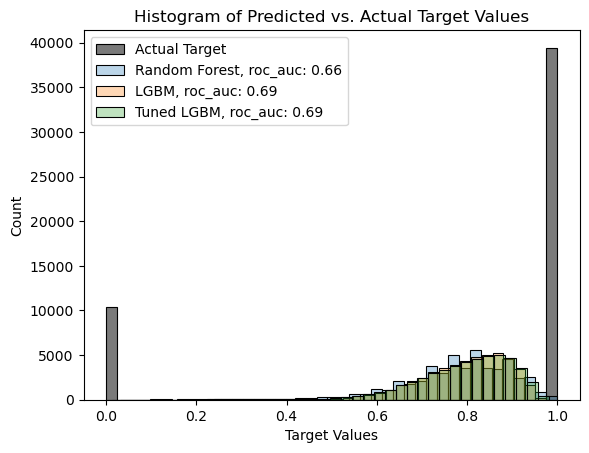

In [57]:
# Plot the histogram of true target values (y_test)
sns.histplot(y_test, label='Actual Target', color='#222222', alpha=0.6, bins=40)

# Plot the histogram of predicted target values using Random Forest (y_pred_rf)
sns.histplot(y_pred_rf, label=('Random Forest, roc_auc: ' + str(round(roc_auc_rf, 2))), alpha=0.3, bins=40)

# Plot the histogram of predicted target values using LightGBM (y_pred_lgbm)
sns.histplot(y_pred_lgbm, label=('LGBM, roc_auc: '+ str(round(roc_auc_lgbm, 2))), alpha=0.3, bins=40)

# Plot the histogram of predicted target values using tuned LightGBM (y_pred_lgbm_tuning)
sns.histplot(y_pred_lgbm_tunning, label=('Tuned LGBM, roc_auc: '+ str(round(roc_auc_lgbm_tunning, 2))), alpha=0.3, bins=40)

# Set the title and labels for the plot
plt.title('Histogram of Predicted vs. Actual Target Values')
plt.xlabel('Target Values')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


## 4. Avaliação Financeira


***AS-IS*** (Hipotético): Reprovar qualquer pessoa que tenha idade igual ou inferior a 28 anos.


**TO-BE**: Utilizar o score gerado pelo modelo para a concessão de crédito.

Solicitação de Crédito Média da Base: R$ 1.000,00

#### 4.1. AS-IS

In [58]:
#Tamanho da Carteira de Crédito
#Divida Total da Carteira
#% de pessoas negadas

#### 4.2. TO-BE

In [59]:
#Tamanho da Carteira de Crédito
#Divida Total da Carteira
#% de pessoas negadas (deve ser o mesmo da AS-IS)